# PU-learning

In [ ]:
# Design plan

# 1) Argparse input
# 2) Input pre-processing
# 3) ML stage
# 4) Additional output: pdfs 

# 1) Argparse input

**Functionality:**

- Input file path
- Output file path
- True genes path
- Pdfs
- ML settings: Choose model, SMOTE, parameters, class_imbalanced procentage
- Some summary

# 2) Input preprocessing

In [47]:
import pandas as pd
from InputProcessingFunctions import *
example = pd.read_csv('../postgap/tmp/output/200_250_filtered_gwas_signal_postgap.txt', sep=',')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [48]:
def mem_usage(pandas_obj):
    if isinstance(pandas_obj,pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else: # we assume if not a df it's a series
        usage_b = pandas_obj.memory_usage(deep=True)
    usage_mb = usage_b / 1024 ** 2 # convert bytes to megabytes
    return "{:03.2f} MB".format(usage_mb)

In [49]:
mem_usage(example)

'25.14 MB'

In [50]:
list(example)

dtypes = example.dtypes
dtypes_col = dtypes.index
dtypes_type = [i.name for i in dtypes.values]
column_types = dict(zip(dtypes_col, dtypes_type))
# rather than print all 161 items, we'll
# sample 10 key/value pairs from the dict
# and print it nicely using prettyprint
preview = first2pairs = {key:value for key,value in list(column_types.items())}
print(preview)

{'ld_snp_rsID': 'object', 'chrom': 'object', 'pos': 'int64', 'GRCh38_chrom': 'int64', 'GRCh38_pos': 'int64', 'afr': 'float64', 'amr': 'float64', 'eas': 'float64', 'eur': 'float64', 'sas': 'float64', 'gnomad': 'float64', 'gnomad_sas': 'float64', 'gnomad_oth': 'float64', 'gnomad_asj': 'float64', 'gnomad_nfe': 'float64', 'gnomad_afr': 'float64', 'gnomad_amr': 'float64', 'gnomad_fin': 'float64', 'gnomad_eas': 'float64', 'gene_symbol': 'object', 'gene_id': 'object', 'gene_chrom': 'int64', 'gene_tss': 'int64', 'GRCh38_gene_chrom': 'int64', 'GRCh38_gene_pos': 'int64', 'disease_name': 'object', 'disease_efo_id': 'object', 'score': 'float64', 'rank': 'int64', 'r2': 'float64', 'cluster_id': 'float64', 'gwas_source': 'object', 'gwas_snp': 'object', 'gwas_pvalue': 'float64', 'gwas_pvalue_description': 'object', 'gwas_odds_ratio': 'object', 'gwas_odds_ratio_ci_start': 'object', 'gwas_odds_ratio_ci_end': 'object', 'gwas_beta': 'float64', 'gwas_size': 'int64', 'gwas_pmid': 'object', 'gwas_study': 'ob

In [59]:
preview = {'afr': 'float16',
           'amr': 'float16',
           'eas': 'float16',
           'eur': 'float16',
           'sas': 'float16',
           'gnomad': 'float16',
           'gnomad_sas': 'float16',
           'gnomad_oth': 'float16',
           'gnomad_asj': 'float16',
           'gnomad_nfe': 'float16',
           'gnomad_afr': 'float16',
           'gnomad_amr': 'float16',
           'gnomad_fin': 'float16',
           'gnomad_eas': 'float16',
           'GTEx_Thyroid': 'float32',
           'GTEx_Testis': 'float32',
           'GTEx_Small_Intestine_Terminal_Ileum': 'float32',
           'GTEx_Nerve_Tibial': 'float32',
           'GTEx_Brain_Frontal_Cortex_BA9': 'float32',
           'GTEx_Skin_Not_Sun_Exposed_Suprapubic': 'float32',
           'GTEx_Vagina': 'float32',
           'GTEx_Whole_Blood': 'float32',
           'GTEx_Breast_Mammary_Tissue': 'float32',
           'GTEx_Ovary': 'float32',
           'GTEx_Adipose_Subcutaneous': 'float32',
           'GTEx_Adrenal_Gland': 'float32',
           'GTEx_Heart_Atrial_Appendage': 'float32',
           'GTEx_Stomach': 'float32',
           'GTEx_Brain_Caudate_basal_ganglia': 'float32',
           'GTEx_Colon_Transverse': 'float32',
           'GTEx_Brain_Cerebellum': 'float32',
           'GTEx_Cells_Transformed_fibroblasts': 'float32',
           'GTEx_Esophagus_Muscularis': 'float32',
           'GTEx_Liver': 'float32',
           'GTEx_Muscle_Skeletal': 'float32',
           'GTEx_Prostate': 'float32',
           'GTEx_Pancreas': 'float32',
           'GTEx_Brain_Hypothalamus': 'float32',
           'GTEx_Spleen': 'float32',
           'GTEx_Colon_Sigmoid': 'float32',
           'GTEx_Brain_Anterior_cingulate_cortex_BA24': 'float32',
           'GTEx_Esophagus_Gastroesophageal_Junction': 'float32',
           'GTEx_Brain_Hippocampus': 'float32',
           'GTEx_Brain_Cortex': 'float32',
           'GTEx_Heart_Left_Ventricle': 'float32',
           'GTEx_Artery_Tibial': 'float32',
           'GTEx_Uterus': 'float32',
           'GTEx_Pituitary': 'float32',
           'GTEx_Cells_EBV-transformed_lymphocytes': 'float32',
           'GTEx_Artery_Coronary': 'float32',
           'GTEx_Adipose_Visceral_Omentum': 'float32',
           'GTEx_Brain_Nucleus_accumbens_basal_ganglia': 'float32',
           'GTEx_Brain_Cerebellar_Hemisphere': 'float32',
           'GTEx_Esophagus_Mucosa': 'float32',
           'GTEx_Artery_Aorta': 'float32',
           'GTEx_Brain_Putamen_basal_ganglia': 'float32',
           'GTEx_Lung': 'float32',
           'GTEx_Skin_Sun_Exposed_Lower_leg': 'float32',
           'GTEx': 'float32',
           'VEP': 'uint8',
           'Nearest': 'uint8'}

In [62]:
read_and_optimized = drop_columns(pd.read_csv('../postgap/tmp/output/200_250_filtered_gwas_signal_postgap.txt', sep=',', dtype=preview))
mem_usage(read_and_optimized)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


'6.12 MB'

In [22]:
import numpy as np
int_types = ["float16", "float32", "float64"]
for it in int_types:
    print(np.finfo(it))

Machine parameters for float16
---------------------------------------------------------------
precision =   3   resolution = 1.00040e-03
machep =    -10   eps =        9.76562e-04
negep =     -11   epsneg =     4.88281e-04
minexp =    -14   tiny =       6.10352e-05
maxexp =     16   max =        6.55040e+04
nexp =        5   min =        -max
---------------------------------------------------------------

Machine parameters for float32
---------------------------------------------------------------
precision =   6   resolution = 1.0000000e-06
machep =    -23   eps =        1.1920929e-07
negep =     -24   epsneg =     5.9604645e-08
minexp =   -126   tiny =       1.1754944e-38
maxexp =    128   max =        3.4028235e+38
nexp =        8   min =        -max
---------------------------------------------------------------

Machine parameters for float64
---------------------------------------------------------------
precision =  15   resolution = 1.0000000000000001e-15
machep =    -52   e

# 3) ML step

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from var import *

In [11]:
#plot_df = pd.DataFrame(columns = ['truth', 'label', 'output_std'])

In [3]:
gtex_frames = pd.read_csv('combined_scz.tsv', sep='\t')
true_genes = pd.read_csv('/home/nikita/Documents/work/git_projects/GWASPriors/SCZ/SCZ/true_genes.csv')
scz_genes = set(true_genes[true_genes['Gene(s)'].map(lambda x: ',' not in str(x))]['Gene(s)']) & set(gtex_frames['gene_symbol'])

In [4]:
len(scz_genes)

47

In [5]:
gtex_frames.describe()

,Adipose - Subcutaneous,Adipose - Visceral (Omentum),Adrenal Gland,Artery - Aorta,Artery - Coronary,Artery - Tibial,Bladder,Brain - Amygdala,Brain - Anterior cingulate cortex (BA24),Brain - Caudate (basal ganglia),...,VEP_reg,Vagina,Whole Blood,blastp_similarity,gene_interactions,gtex_similarity,rank,score,vep_mean,vep_sum
count,3219.00000,3219.000000,3219.000000,3219.000000,3219.000000,3219.000000,3219.000000,3219.000000,3219.000000,3219.000000,...,3219.000000,3219.000000,3219.000000,3219.000000,3219.000000,3219.000000,3219.000000,3219.000000,3219.000000,3219.000000
mean,26.81516,24.043492,21.866107,27.843119,28.365020,26.493321,31.016154,13.731904,16.765144,16.727555,...,0.271350,29.802112,9.822926,0.052811,0.227089,0.155017,17.959481,0.911607,0.040553,0.297160
std,13.92137,12.932294,14.353580,14.849857,13.399258,16.016273,13.724801,13.858914,15.058168,13.830053,...,0.197634,12.949452,15.102211,0.260886,0.659820,0.529328,15.312963,0.456208,0.158820,1.509242
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.007770,0.000000,0.000000
25%,17.00000,16.000000,11.000000,18.000000,21.000000,14.000000,24.000000,3.000000,5.000000,7.000000,...,0.177662,23.000000,0.000000,0.000000,0.000000,0.000000,6.175439,0.923875,0.000000,0.000000
50%,29.00000,24.000000,20.000000,30.000000,30.000000,28.000000,34.000000,8.000000,11.000000,11.000000,...,0.245394,33.000000,1.000000,0.000000,0.000000,0.000000,13.774033,0.978402,0.000000,0.000000
75%,37.00000,33.000000,32.000000,40.000000,38.000000,40.000000,41.000000,21.000000,27.000000,25.000000,...,0.324324,39.000000,14.000000,0.000000,0.000000,0.000000,25.602050,0.996074,0.000000,0.000000
max,52.00000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,...,1.000000,52.000000,52.000000,2.000000,7.000000,7.000000,95.000000,3.086668,1.045455,28.123237


In [6]:
def return_x_y(gtex_frames, scz_genes):
    y = gtex_frames['gene_symbol'].map(lambda x: 1 if x in scz_genes else 0)
    #gtex_frames.drop('gene_id', axis=1, inplace=True)
    x = gtex_frames.fillna(0).set_index('gene_symbol')
    return x, y

x, y = return_x_y(gtex_frames, scz_genes)

In [7]:
new_x = x.copy()
new_x['y'] = list(y.map(lambda x: str(bool(x))))
new_x.groupby('y').aggregate({'gtex_similarity':'mean'})

,gtex_similarity
y,
False,0.148802
True,0.574468


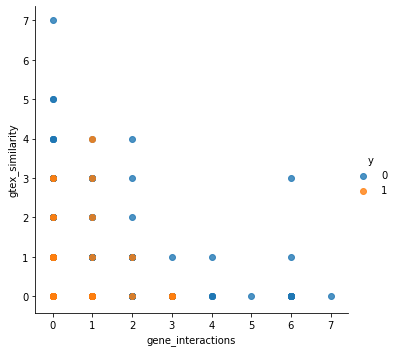

In [8]:
new_x = x.copy() 
new_x['y'] = list(y)
sns.lmplot(data = new_x, x = 'gene_interactions', y='gtex_similarity', hue='y', fit_reg=False)

# Artificial data Expreriment

In [18]:
import numpy as np
%matplotlib inline
import matplotlib.pylab as plt
from sklearn.datasets import make_blobs
import pandas as pd

In [ ]:
N = 6000
known_labels_ratio = 0.005

X, y = make_blobs(
    n_samples = N, 
    centers = [[1,5], [5,1], [0,0], [6,6]],
    cluster_std = 1.5
)

# Convert the original labels from [0,1,2,3] to just [0,1]
y = (y > 1).astype(int)  
y = pd.Series(y)

rp = np.random.permutation(int(N/2))
data_P = X[y==1][rp[:int(len(rp)*known_labels_ratio)]]
data_U = np.concatenate((X[y==1][rp[int(len(rp)*known_labels_ratio):]], X[y==0]), axis=0)
print("Amount of labeled samples: %d" % (data_P.shape[0]))
plt.figure(figsize=(8, 4.5))
plt.scatter(data_U[:, 0], data_U[:, 1], c='k', marker='.', linewidth=1, s=1, alpha=0.5, label='Unlabeled')
plt.scatter(data_P[:, 0], data_P[:, 1], c='r', marker='^', linewidth=0, s=30, alpha=1, label='Positive')
plt.grid()
plt.legend()

# Real data Expreriment

In [9]:
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

#x_norm = scale(x)
X_train, X_test, y_train, y_test =  train_test_split(x, y, 
                                                     test_size=0.35)

In [10]:
from imblearn.over_sampling import SMOTE
from collections import Counter

def return_SMOTE(X_train, y_train, ratio=0.5):
    sampler = SMOTE(ratio=0.5, random_state=42)
    X_rs, y_rs = sampler.fit_sample(X_train, y_train)
    return X_rs, y_rs

if sum(y_train)/len(y_train) <= 0.3:
    new_X_train, new_y_train = return_SMOTE(X_train, y_train)

In [11]:
# Models

svc = SVC(probability=True, class_weight={1:1, 0:100})
rf = RandomForestClassifier()
lr = LogisticRegression(class_weight={1:1, 0:100})
xgb = XGBClassifier(
        eval_metric = 'auc',
        learning_rate=0.1,
        nthread = 4,
        silent = True,
        objective='binary:logistic',
        class_weight={1:1, 0:100})

In [12]:
def best_parameters(model, new_X_train, new_y_train, param_dist):
    cv_rf = GridSearchCV(model, cv = 5,
                     param_grid=param_dist, 
                     n_jobs = 3)
    cv_rf.fit(new_X_train, new_y_train)
    print('Best Parameters using grid search: \n', 
      cv_rf.best_params_)
    return cv_rf.best_params_
    
    

In [13]:
PARAM_DIST_RF = {'max_depth': [5, 10, 15, 20, 30, 50, 100],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}
               #'min_samples_leaf': [1, 2, 4],
               #'min_samples_split': [2, 5, 10]}
        
PARAM_DIST_SVC = {'C':[1,10,100,1000],
                'gamma':[1,0.1,0.001,0.0001],
                'kernel':['linear','rbf']}
                    
PARAM_DIST_LR = {"C":np.logspace(-3,3,10),
                 "penalty":["l1","l2"]}

PARAM_DIST_XGB = {'eta': [0.05, 0.1, 0.3],
                 'max_depth': [6, 9, 12]}
#                  'gamma':[1,0.1,0.001]
#                  'min_child_weight': [1, 2, 5]
#                  'num_boost_round': [100, 250, 500],
#                  'subsample': [0.9, 1.0],
#                  'colsample_bytree': [0.9, 1.0],
#                  'colsample_bylevel': [0.9, 1.0]}

In [91]:
parameters_rf = best_parameters(rf, new_X_train, new_y_train, PARAM_DIST_RF)

# Best Parameters using grid search: 
#  {'criterion': 'entropy', 'max_depth': 10, 'max_features': None}

Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 30, 'max_features': 'log2'}


In [92]:
rf.set_params(bootstrap = True,
              criterion = parameters_rf['criterion'],
              max_depth = parameters_rf['max_depth'],
              max_features = parameters_rf['max_features'],
              min_samples_leaf = 1,
              min_samples_split = 2,
              n_estimators=700,
              class_weight={1:1, 0:100})

RandomForestClassifier(bootstrap=True, class_weight={1: 1, 0: 100},
            criterion='gini', max_depth=30, max_features='log2',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=700, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [94]:
parameters_lr = best_parameters(lr, new_X_train, new_y_train, PARAM_DIST_LR)
lr.set_params(C = parameters_lr['C'],
              penalty = parameters_lr['penalty'])

# Best Parameters using grid search: 
#  {'C': 46.41588833612773, 'penalty': 'l1'}

Best Parameters using grid search: 
 {'C': 2.154434690031882, 'penalty': 'l1'}


LogisticRegression(C=2.154434690031882, class_weight={1: 1, 0: 100},
          dual=False, fit_intercept=True, intercept_scaling=1,
          max_iter=100, multi_class='warn', n_jobs=None, penalty='l1',
          random_state=None, solver='warn', tol=0.0001, verbose=0,
          warm_start=False)

In [95]:
parameters_svc = best_parameters(svc, new_X_train, new_y_train, PARAM_DIST_SVC)
svc.set_params(C=parameters_svc['C'],
                gamma=parameters_svc['gamma'],
                kernel=parameters_svc['kernel'])

# Best Parameters using grid search: 
#  {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}

Best Parameters using grid search: 
 {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}


SVC(C=10, cache_size=200, class_weight={1: 1, 0: 100}, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [96]:
def best_parameters_xgb(model, new_X_train, new_y_train, X_test, y_test, param_dist):
    cv_rf = GridSearchCV(model, cv = 5,
                     param_grid=param_dist, 
                     n_jobs = 3,
                     scoring='neg_log_loss')
    cv_rf.fit(new_X_train, new_y_train, eval_metric='logloss', verbose=True,
            eval_set=[(new_X_train, new_y_train),(X_test, y_test)], early_stopping_rounds=100)
    print('Best Parameters using grid search: \n', 
      cv_rf.best_params_)
    return cv_rf.best_params_


In [97]:
xgb_X_train = pd.DataFrame(new_X_train, columns=list(X_test))

In [101]:
parameters_xgb = best_parameters_xgb(xgb, xgb_X_train, new_y_train, X_test, y_test, PARAM_DIST_XGB)

xgb.set_params(num_boost_round=150,
                eta=parameters_xgb['eta'],
                max_depth=parameters_xgb['max_depth'],
                subsample=1, # parameters_xgb['subsample']
                colsample_bytree=0.9, #  parameters_xgb['colsample_bytree']
                colsample_bylevel=0.9, #  parameters_xgb['colsample_bylevel']
                gamma=0.001,
                min_child_weight=1,
                n_estimators=700)


# XGBClassifier(base_score=0.5, booster='gbtree', class_weight={1: 1, 0: 100},
#        colsample_bylevel=0.9, colsample_bynode=1, colsample_bytree=0.9,
#        eta=0.05, eval_metric='auc', gamma=0.001, learning_rate=0.1,
#        max_delta_step=0, max_depth=6, min_child_weight=1, missing=None,
#        n_estimators=700, n_jobs=1, nthread=4, num_boost_round=150,
#        objective='binary:logistic', random_state=0, reg_alpha=0,
#        reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
#        subsample=1, verbosity=1)

[0]	validation_0-logloss:0.60208	validation_1-logloss:0.606865
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 100 rounds.
[1]	validation_0-logloss:0.527426	validation_1-logloss:0.536552
[2]	validation_0-logloss:0.465123	validation_1-logloss:0.477635
[3]	validation_0-logloss:0.412202	validation_1-logloss:0.428528
[4]	validation_0-logloss:0.365999	validation_1-logloss:0.385853
[5]	validation_0-logloss:0.325759	validation_1-logloss:0.349093
[6]	validation_0-logloss:0.291411	validation_1-logloss:0.317426
[7]	validation_0-logloss:0.261057	validation_1-logloss:0.290065
[8]	validation_0-logloss:0.234463	validation_1-logloss:0.266681
[9]	validation_0-logloss:0.210687	validation_1-logloss:0.245753
[10]	validation_0-logloss:0.189581	validation_1-logloss:0.2265
[11]	validation_0-logloss:0.171233	validation_1-logloss:0.21022
[12]	validation_0-logloss:0.154717	validation_1-logloss:0.195778
[13

XGBClassifier(base_score=0.5, booster='gbtree', class_weight={1: 1, 0: 100},
       colsample_bylevel=0.9, colsample_bynode=1, colsample_bytree=0.9,
       eta=0.05, eval_metric='auc', gamma=0.001, learning_rate=0.1,
       max_delta_step=0, max_depth=12, min_child_weight=1, missing=None,
       n_estimators=700, n_jobs=1, nthread=4, num_boost_round=150,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1, verbosity=1)

In [102]:
models = [rf, svc, lr]

In [87]:
# n_estim_param = {'n_estimators': [i for i in range(100,1500,50)]}
# parameters = best_parameters(rf, new_X_train, new_y_train, n_estim_param)

In [160]:
def new_final_output(ml_list,X_test, y_test, n_estimators=100):
    
    estimator = ml_list[0]
    new_x = pd.DataFrame(ml_list[1])
    y = ml_list[2]
    iP = y[y > 0].index
    iU = y[y <= 0].index
    num_oob = pd.DataFrame(np.zeros(shape = y.shape), index = y.index)
    sum_oob = pd.DataFrame(np.zeros(shape = y.shape), index = y.index)
    
    for _ in range(n_estimators):
        # Get a bootstrap sample of unlabeled points for this round
        ib = np.random.choice(iU, replace = True, size = 4*len(iP))
    
        # Find the OOB data points for this round
        i_oob = list(set(iU) - set(ib))
    
        # Get the training data (ALL positives and the bootstrap
        # sample of unlabeled points) and build the tree
        Xb = new_x[list(y>0)].append(new_x.iloc[ib])
        yb = y[y > 0].append(y.iloc[ib])
        calib_model = estimator
        calib_model.fit(Xb, yb)
        # Record the OOB scores from this round
        sum_oob.loc[i_oob, 0] += calib_model.predict_proba(new_x.iloc[i_oob])[:,1]
        num_oob.loc[i_oob, 0] += 1
        
        calib_model.fit(Xb, yb)
        
    results = pd.DataFrame(new_x.index)
    results['Average_prob'] = sum_oob / num_oob
    return results

In [14]:
def final_output(x, y, model, n_estimators=100):
    
    from var import PARAM_DIST_RF, PARAM_DIST_SVC, PARAM_DIST_LR, PARAM_DIST_DT
        
    iP = y[y > 0].index
    iU = y[y <= 0].index
    
    num_oob = pd.DataFrame(np.zeros(shape = y.shape), index = y.index)
    sum_oob = pd.DataFrame(np.zeros(shape = y.shape), index = y.index)
    
    for _ in range(n_estimators):
        # Get a bootstrap sample of unlabeled points for this round
        ib = np.random.choice(iU, replace = True, size = len(iP))
    
        # Find the OOB data points for this round
        i_oob = list(set(iU) - set(ib))
    
        # Get the training data (ALL positives and the bootstrap
        # sample of unlabeled points) and build the tree
        Xb = x[list(y>0)].append(x.iloc[ib])
        yb = y[y > 0].append(y.iloc[ib])
        
        #new_Xb, new_yb = return_SMOTE(Xb, yb)
        Xb, yb
        #new_Xb = pd.DataFrame(new_Xb)
        #new_yb = pd.Series(new_yb)
        
        weights = {1:1, 0:100}
        
        if model == 'rf':
            estimator = RandomForestClassifier(class_weight=weights)
            parameters_rf = best_parameters(estimator, Xb, yb, PARAM_DIST_RF)
            estimator.set_params(bootstrap = True,
              max_depth = parameters_rf['max_depth'],
              max_features = parameters_rf['max_features'],
              min_samples_leaf = 1,
              min_samples_split = 2,
              n_estimators=600)
        elif model == 'lr':
            estimator = LogisticRegression(class_weight=weights)
            parameters_lr = best_parameters(estimator, Xb, yb, PARAM_DIST_LR)
            estimator.set_params(C = parameters_lr['C'], penalty = parameters_lr['penalty'])
        elif model == 'svc':
            estimator = SVC(probability=True, class_weight=weights)
            parameters_svc = best_parameters(estimator, Xb, yb, PARAM_DIST_SVC)
            estimator.set_params(C=parameters_svc['C'], gamma=parameters_svc['gamma'])
        elif model == 'dt':
            estimator = DecisionTreeClassifier(criterion='gini', class_weight=weights)
            parameters_dt = best_parameters(estimator, Xb, yb, PARAM_DIST_DT)
            estimator.set_params(max_depth = parameters_dt['max_depth'],
                           min_samples_leaf = parameters_dt['min_samples_leaf'],
                           min_samples_split = parameters_dt['min_samples_split'])
        
        estimator.fit(Xb, yb)
        # Record the OOB scores from this round
        sum_oob.loc[i_oob, 0] += estimator.predict_proba(x.iloc[i_oob])[:,1]
        num_oob.loc[i_oob, 0] += 1
    
    results = pd.DataFrame(x.index)
    results['Average_prob'] = sum_oob / num_oob
    return results

In [16]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

models = ['lr', 'rf', 'svc', 'dt'] # , 'LR':lr, 'XGB':xgb, 'SVC':svc

plot_dfs = {'lr_results':0,
            'rf_results':0,
            'svc_results':0,
            'dt_results':0}

for model in models:
    predicted_y = final_output(pd.DataFrame(x), y, model)['Average_prob']
    plot_dfs[f'{model}_results'] = pd.DataFrame({"true_y":y,
                                               "predicted_y":predicted_y})

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters using grid search: 
 {'C': 46.41588833612773, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters using grid search: 
 {'C': 1000.0, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters using grid search: 
 {'C': 215.44346900318823, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters using grid search: 
 {'C': 1000.0, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters using grid search: 
 {'C': 215.44346900318823, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters using grid search: 
 {'C': 1000.0, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters using grid search: 
 {'C': 46.41588833612773, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters using grid search: 
 {'C': 2.154434690031882, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters using grid search: 
 {'C': 46.41588833612773, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters using grid search: 
 {'C': 10.0, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters using grid search: 
 {'C': 46.41588833612773, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters using grid search: 
 {'C': 215.44346900318823, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters using grid search: 
 {'C': 46.41588833612773, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters using grid search: 
 {'C': 215.44346900318823, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters using grid search: 
 {'C': 10.0, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters using grid search: 
 {'C': 215.44346900318823, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters using grid search: 
 {'C': 46.41588833612773, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters using grid search: 
 {'C': 46.41588833612773, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters using grid search: 
 {'C': 46.41588833612773, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters using grid search: 
 {'C': 46.41588833612773, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters using grid search: 
 {'C': 10.0, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters using grid search: 
 {'C': 46.41588833612773, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters using grid search: 
 {'C': 46.41588833612773, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters using grid search: 
 {'C': 2.154434690031882, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters using grid search: 
 {'C': 215.44346900318823, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters using grid search: 
 {'C': 46.41588833612773, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters using grid search: 
 {'C': 2.154434690031882, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters using grid search: 
 {'C': 46.41588833612773, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters using grid search: 
 {'C': 215.44346900318823, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters using grid search: 
 {'C': 10.0, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters using grid search: 
 {'C': 1000.0, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters using grid search: 
 {'C': 1000.0, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters using grid search: 
 {'C': 46.41588833612773, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters using grid search: 
 {'C': 10.0, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters using grid search: 
 {'C': 1000.0, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters using grid search: 
 {'C': 10.0, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters using grid search: 
 {'C': 46.41588833612773, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters using grid search: 
 {'C': 46.41588833612773, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters using grid search: 
 {'C': 46.41588833612773, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters using grid search: 
 {'C': 215.44346900318823, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters using grid search: 
 {'C': 10.0, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters using grid search: 
 {'C': 10.0, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters using grid search: 
 {'C': 1000.0, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters using grid search: 
 {'C': 10.0, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters using grid search: 
 {'C': 215.44346900318823, 'penalty': 'l2'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters using grid search: 
 {'C': 46.41588833612773, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters using grid search: 
 {'C': 0.46415888336127775, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters using grid search: 
 {'C': 2.154434690031882, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters using grid search: 
 {'C': 46.41588833612773, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters using grid search: 
 {'C': 46.41588833612773, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters using grid search: 
 {'C': 2.154434690031882, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters using grid search: 
 {'C': 46.41588833612773, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters using grid search: 
 {'C': 215.44346900318823, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters using grid search: 
 {'C': 215.44346900318823, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters using grid search: 
 {'C': 2.154434690031882, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters using grid search: 
 {'C': 10.0, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters using grid search: 
 {'C': 46.41588833612773, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters using grid search: 
 {'C': 46.41588833612773, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters using grid search: 
 {'C': 46.41588833612773, 'penalty': 'l2'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters using grid search: 
 {'C': 46.41588833612773, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters using grid search: 
 {'C': 10.0, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters using grid search: 
 {'C': 10.0, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters using grid search: 
 {'C': 46.41588833612773, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters using grid search: 
 {'C': 10.0, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters using grid search: 
 {'C': 46.41588833612773, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters using grid search: 
 {'C': 215.44346900318823, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters using grid search: 
 {'C': 1000.0, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters using grid search: 
 {'C': 1000.0, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters using grid search: 
 {'C': 10.0, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters using grid search: 
 {'C': 1000.0, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters using grid search: 
 {'C': 215.44346900318823, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters using grid search: 
 {'C': 0.021544346900318832, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters using grid search: 
 {'C': 215.44346900318823, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters using grid search: 
 {'C': 10.0, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters using grid search: 
 {'C': 1000.0, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters using grid search: 
 {'C': 10.0, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters using grid search: 
 {'C': 1000.0, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters using grid search: 
 {'C': 46.41588833612773, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters using grid search: 
 {'C': 1000.0, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters using grid search: 
 {'C': 1000.0, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters using grid search: 
 {'C': 10.0, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters using grid search: 
 {'C': 10.0, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters using grid search: 
 {'C': 0.1, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters using grid search: 
 {'C': 1000.0, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters using grid search: 
 {'C': 46.41588833612773, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters using grid search: 
 {'C': 10.0, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters using grid search: 
 {'C': 10.0, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters using grid search: 
 {'C': 46.41588833612773, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters using grid search: 
 {'C': 215.44346900318823, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters using grid search: 
 {'C': 1000.0, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters using grid search: 
 {'C': 46.41588833612773, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters using grid search: 
 {'C': 2.154434690031882, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters using grid search: 
 {'C': 46.41588833612773, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters using grid search: 
 {'C': 10.0, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters using grid search: 
 {'C': 0.46415888336127775, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters using grid search: 
 {'C': 46.41588833612773, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters using grid search: 
 {'C': 10.0, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters using grid search: 
 {'C': 1000.0, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters using grid search: 
 {'C': 46.41588833612773, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Parameters using grid search: 
 {'C': 1000.0, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'max_depth': 15, 'max_features': 'auto'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'max_depth': 10, 'max_features': None}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'max_depth': 50, 'max_features': None}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'max_depth': 10, 'max_features': 'auto'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'max_depth': 15, 'max_features': None}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'max_depth': 5, 'max_features': 'auto'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'max_depth': 20, 'max_features': None}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'max_depth': 5, 'max_features': 'auto'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'max_depth': 5, 'max_features': None}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'max_depth': 10, 'max_features': 'sqrt'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'max_depth': 50, 'max_features': 'log2'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'max_depth': 100, 'max_features': 'log2'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'max_depth': 10, 'max_features': None}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'max_depth': 5, 'max_features': None}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'max_depth': 20, 'max_features': 'auto'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'max_depth': 15, 'max_features': 'log2'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'max_depth': 5, 'max_features': 'sqrt'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'max_depth': 20, 'max_features': 'auto'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'max_depth': 30, 'max_features': None}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'max_depth': 50, 'max_features': 'auto'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'max_depth': 30, 'max_features': None}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'max_depth': 20, 'max_features': 'sqrt'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'max_depth': 10, 'max_features': 'auto'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'max_depth': 30, 'max_features': None}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'max_depth': 100, 'max_features': 'auto'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'max_depth': 10, 'max_features': 'log2'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'max_depth': 30, 'max_features': 'sqrt'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'max_depth': 5, 'max_features': 'auto'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'max_depth': 5, 'max_features': 'auto'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'max_depth': 30, 'max_features': 'sqrt'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'max_depth': 100, 'max_features': None}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'max_depth': 10, 'max_features': None}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'max_depth': 5, 'max_features': None}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'max_depth': 15, 'max_features': 'log2'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'max_depth': 10, 'max_features': 'auto'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'max_depth': 100, 'max_features': None}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'max_depth': 5, 'max_features': None}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'max_depth': 5, 'max_features': 'auto'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'max_depth': 50, 'max_features': 'auto'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'max_depth': 5, 'max_features': None}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'max_depth': 5, 'max_features': 'sqrt'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'max_depth': 15, 'max_features': 'sqrt'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'max_depth': 30, 'max_features': 'auto'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'max_depth': 30, 'max_features': 'auto'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'max_depth': 5, 'max_features': None}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'max_depth': 10, 'max_features': None}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'max_depth': 20, 'max_features': None}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'max_depth': 10, 'max_features': 'sqrt'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'max_depth': 10, 'max_features': 'auto'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'max_depth': 20, 'max_features': 'sqrt'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'max_depth': 100, 'max_features': 'auto'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'max_depth': 15, 'max_features': 'log2'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'max_depth': 50, 'max_features': None}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'max_depth': 50, 'max_features': 'auto'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'max_depth': 15, 'max_features': 'auto'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'max_depth': 30, 'max_features': 'log2'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'max_depth': 5, 'max_features': 'sqrt'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'max_depth': 15, 'max_features': 'sqrt'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'max_depth': 100, 'max_features': 'log2'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'max_depth': 5, 'max_features': 'auto'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'max_depth': 15, 'max_features': 'auto'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'max_depth': 30, 'max_features': 'log2'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'max_depth': 30, 'max_features': 'auto'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'max_depth': 30, 'max_features': 'log2'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'max_depth': 20, 'max_features': 'auto'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'max_depth': 50, 'max_features': 'sqrt'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'max_depth': 30, 'max_features': 'sqrt'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'max_depth': 100, 'max_features': 'auto'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'max_depth': 15, 'max_features': 'sqrt'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'max_depth': 50, 'max_features': 'sqrt'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'max_depth': 20, 'max_features': None}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'max_depth': 15, 'max_features': 'log2'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'max_depth': 10, 'max_features': None}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'max_depth': 30, 'max_features': 'sqrt'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'max_depth': 5, 'max_features': 'sqrt'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'max_depth': 30, 'max_features': 'log2'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'max_depth': 20, 'max_features': 'sqrt'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'max_depth': 10, 'max_features': None}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'max_depth': 15, 'max_features': 'log2'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'max_depth': 20, 'max_features': 'sqrt'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'max_depth': 30, 'max_features': 'sqrt'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'max_depth': 100, 'max_features': 'log2'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'max_depth': 5, 'max_features': None}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'max_depth': 15, 'max_features': 'auto'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'max_depth': 5, 'max_features': 'log2'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'max_depth': 30, 'max_features': None}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'max_depth': 30, 'max_features': None}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'max_depth': 5, 'max_features': None}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'max_depth': 30, 'max_features': 'sqrt'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'max_depth': 10, 'max_features': None}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'max_depth': 100, 'max_features': None}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'max_depth': 20, 'max_features': 'sqrt'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'max_depth': 20, 'max_features': 'log2'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'max_depth': 20, 'max_features': None}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'max_depth': 5, 'max_features': 'auto'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'max_depth': 30, 'max_features': 'log2'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'max_depth': 10, 'max_features': None}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'max_depth': 15, 'max_features': 'auto'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'max_depth': 20, 'max_features': 'sqrt'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'max_depth': 20, 'max_features': 'auto'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'C': 10, 'gamma': 0.0001}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'C': 10, 'gamma': 0.0001}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'C': 10, 'gamma': 0.0001}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'C': 1, 'gamma': 0.0001}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'C': 1, 'gamma': 0.0001}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'C': 10, 'gamma': 0.0001}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'C': 10, 'gamma': 0.0001}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'C': 10, 'gamma': 0.0001}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'C': 10, 'gamma': 0.0001}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'C': 1, 'gamma': 0.0001}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'C': 1, 'gamma': 0.0001}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'C': 10, 'gamma': 0.0001}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'C': 10, 'gamma': 0.0001}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'C': 10, 'gamma': 0.0001}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'C': 10, 'gamma': 0.0001}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'C': 10, 'gamma': 0.0001}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'C': 10, 'gamma': 0.0001}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'C': 10, 'gamma': 0.0001}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'C': 10, 'gamma': 0.0001}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'C': 10, 'gamma': 0.0001}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'C': 10, 'gamma': 0.0001}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'C': 10, 'gamma': 0.0001}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'C': 10, 'gamma': 0.0001}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'C': 10, 'gamma': 0.0001}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'C': 1, 'gamma': 0.0001}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'C': 10, 'gamma': 0.0001}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'C': 1, 'gamma': 0.0001}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'C': 10, 'gamma': 0.0001}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'C': 10, 'gamma': 0.0001}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'C': 1, 'gamma': 0.0001}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'C': 10, 'gamma': 0.0001}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'C': 1, 'gamma': 0.1}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'C': 1, 'gamma': 0.0001}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'C': 1, 'gamma': 0.0001}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'C': 1, 'gamma': 0.0001}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'C': 10, 'gamma': 0.0001}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'C': 1, 'gamma': 0.0001}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'C': 10, 'gamma': 0.0001}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'C': 10, 'gamma': 0.0001}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'C': 10, 'gamma': 0.0001}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'C': 10, 'gamma': 0.0001}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'C': 1, 'gamma': 0.0001}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'C': 10, 'gamma': 0.0001}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'C': 1, 'gamma': 0.0001}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'C': 10, 'gamma': 0.0001}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'C': 10, 'gamma': 0.0001}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'C': 10, 'gamma': 0.0001}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'C': 10, 'gamma': 0.0001}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'C': 10, 'gamma': 0.0001}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'C': 10, 'gamma': 0.0001}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'C': 10, 'gamma': 0.0001}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'C': 10, 'gamma': 0.0001}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'C': 10, 'gamma': 0.0001}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'C': 10, 'gamma': 0.0001}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'C': 10, 'gamma': 0.0001}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'C': 1, 'gamma': 0.0001}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'C': 10, 'gamma': 0.0001}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'C': 1, 'gamma': 0.0001}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'C': 10, 'gamma': 0.0001}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'C': 1, 'gamma': 0.0001}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'C': 10, 'gamma': 0.0001}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'C': 10, 'gamma': 0.0001}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'C': 1, 'gamma': 0.0001}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'C': 10, 'gamma': 0.0001}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'C': 1, 'gamma': 0.0001}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'C': 1, 'gamma': 0.0001}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'C': 10, 'gamma': 0.0001}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'C': 10, 'gamma': 0.0001}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'C': 1, 'gamma': 0.0001}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'C': 10, 'gamma': 0.0001}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'C': 10, 'gamma': 0.0001}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'C': 10, 'gamma': 0.0001}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'C': 10, 'gamma': 0.0001}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'C': 10, 'gamma': 0.0001}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'C': 10, 'gamma': 0.0001}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'C': 1, 'gamma': 0.0001}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'C': 10, 'gamma': 0.0001}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'C': 10, 'gamma': 0.0001}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'C': 10, 'gamma': 0.0001}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'C': 10, 'gamma': 0.0001}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'C': 10, 'gamma': 0.0001}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'C': 10, 'gamma': 0.0001}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'C': 10, 'gamma': 0.0001}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'C': 10, 'gamma': 0.0001}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'C': 10, 'gamma': 0.0001}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'C': 10, 'gamma': 0.0001}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'C': 1, 'gamma': 0.0001}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'C': 10, 'gamma': 0.0001}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'C': 1, 'gamma': 0.0001}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'C': 1, 'gamma': 0.001}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'C': 10, 'gamma': 0.0001}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'C': 10, 'gamma': 0.0001}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'C': 10, 'gamma': 0.0001}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'C': 1, 'gamma': 0.0001}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'C': 10, 'gamma': 0.0001}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'C': 10, 'gamma': 0.0001}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'C': 10, 'gamma': 0.0001}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'C': 10, 'gamma': 0.0001}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'C': 10, 'gamma': 0.0001}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'C': 10, 'gamma': 0.0001}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 3}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'max_depth': 30, 'min_samples_leaf': 3, 'min_samples_split': 3}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 3}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 4}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 5}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 3}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 3}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 2}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 3}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 3}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 3}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 4}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 5}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'max_depth': 50, 'min_samples_leaf': 4, 'min_samples_split': 4}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'max_depth': 50, 'min_samples_leaf': 4, 'min_samples_split': 2}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 3}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 3}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'max_depth': 50, 'min_samples_leaf': 3, 'min_samples_split': 4}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 3}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'max_depth': 15, 'min_samples_leaf': 3, 'min_samples_split': 2}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 4}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'max_depth': 50, 'min_samples_leaf': 2, 'min_samples_split': 2}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'max_depth': 15, 'min_samples_leaf': 3, 'min_samples_split': 2}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 4}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 4}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 4}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 3}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 5}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 3}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 4}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 5}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'max_depth': 50, 'min_samples_leaf': 2, 'min_samples_split': 4}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 2}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'max_depth': 15, 'min_samples_leaf': 3, 'min_samples_split': 2}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 4}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 4}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 5}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 2}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 4}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 2}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'max_depth': 30, 'min_samples_leaf': 3, 'min_samples_split': 3}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 3}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'max_depth': 50, 'min_samples_leaf': 3, 'min_samples_split': 4}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 2}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 4}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 4}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 5}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 4}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 3}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'max_depth': 30, 'min_samples_leaf': 3, 'min_samples_split': 5}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 4}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 4}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 3}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 5}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 3}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 5}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 4}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 4}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'max_depth': 30, 'min_samples_leaf': 3, 'min_samples_split': 3}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 3}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 3}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 3}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 4}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 5}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 3}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 5}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 2}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 2}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters using grid search: 
 {'max_depth': 50, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Parameters using grid search: 
 {'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 3}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [29]:
for key, value in plot_dfs.items():
    ind = x.index
    pd.DataFrame({'gene_symbol': ind, 'Mean':value['predicted_y'], 'y':pd.Series(ind).map(lambda x: x in gsea)}).to_csv(f'/home/nikita/Desktop/project_output/experiments/scz/{key}.tsv', sep='\t', index=False)

In [23]:
gsea = {'ACTR1B',
 'ADAM10',
 'AKT3',
 'ALMS1',
 'ANKK1',
 'ARHGAP40',
 'ASPDH',
 'ATP2A2',
 'ATXN7',
 'B3GAT1',
 'BCL11A',
 'BCL11B',
 'BNIP3L',
 'BRINP2',
 'C12orf76',
 'CACNA1C',
 'CACNA1D',
 'CACNA1I',
 'CACNB2',
 'CALN1',
 'CCDC92',
 'CDIP1',
 'CDK10',
 'CDK2AP1',
 'CES3',
 'CHADL',
 'CHRNA3',
 'CLCN3',
 'CLU',
 'CNNM2',
 'CNTN4',
 'CPEB1',
 'CSMD1',
 'CTDP1',
 'CTDSPL',
 'CTNND1',
 'CXXC5',
 'DBNDD1',
 'DDHD2',
 'DGKZ',
 'DLX2',
 'DNAJC19',
 'DPP4',
 'DPYD',
 'EGR1',
 'EPN2',
 'ESAM',
 'FAM222A',
 'FES',
 'FHIT',
 'FOXO3',
 'FTCDNL1',
 'FUT9',
 'GABBR2',
 'GPM6A',
 'GRAMD1B',
 'GRIN2A',
 'GRM3',
 'HAPLN4',
 'HCN1',
 'IMMP2L',
 'INO80E',
 'KCNB1',
 'KCNG2',
 'KLHL2',
 'LRRC43',
 'MAPK8IP2',
 'MARK3',
 'MCHR1',
 'MEF2C',
 'MFAP3',
 'MMP16',
 'MPP6',
 'MRPL33',
 'MYBPC3',
 'NDUFA6',
 'NEGR1',
 'NFYB',
 'NGEF',
 'NMUR2',
 'NPRL2',
 'OPCML',
 'PBRM1',
 'PLCB2',
 'PLCL1',
 'PLCL2',
 'PLEKHO1',
 'PPARGC1A',
 'PPP1R13B',
 'PPP1R16B',
 'PRKD1',
 'PRR12',
 'PRSS35',
 'PSD',
 'PSD3',
 'PTBP2',
 'PTN',
 'R3HDM2',
 'RAB27B',
 'RBFOX1',
 'RBMS3',
 'RGS6',
 'RIMS1',
 'RLBP1',
 'RUNDC3B',
 'SATB2',
 'SDCCAG8',
 'SDHAF1',
 'SEPT3',
 'SFXN5',
 'SMG6',
 'SMIM15',
 'SNX19',
 'SP4',
 'SPATA19',
 'SPATS2L',
 'SPECC1',
 'SPG7',
 'SRPK2',
 'STAG1',
 'TAC3',
 'TMTC1',
 'TRANK1',
 'TRPC4',
 'TRPM6',
 'TSNARE1',
 'TTBK1',
 'UBE2Q2L',
 'VRK2',
 'YWHAE',
 'ZEB2',
 'ZMAT2',
 'ZNF365',
 'ZNF804A',
 'ZNF823',
 'ZSCAN23'}

In [38]:
import glob
import os

path = r'/home/nikita/Desktop/project_output/experiments/scz/' # use your path
all_files = glob.glob(os.path.join(path, "*.tsv"))



for filename in all_files:
    df = pd.read_csv(filename, sep='\t')
    from plotnine import *

    df['gene_symbol'] = [i for i in range(len(df))]

    fig = (
        ggplot(df[df['y'] == True], aes(x='gene_symbol', col='y')) +
              geom_density(fill="#56B4E9", alpha = 0.3, colour = None, show_legend = True) +
              geom_rug(color='black', show_legend = True) +
              theme_bw() +
              theme(plot_title = element_text(hjust = 0.5, size=12), figure_size = (10, 6)) +
              theme(legend_background = element_rect(fill="gray90", size=.5, linetype="dotted")) +
              theme(legend_title = element_text(colour="black", size=12)) +
              ggtitle('Distribution of gene names from extended list') +
              xlab(f'Sorted in descending order gene names {filename}') +
              ylab('Density')
            )
    save_as_pdf_pages([fig], )


/usr/local/lib/python3.6/dist-packages/plotnine/ggplot.py:848: PlotnineWarning: Filename: plotnine-save-9223363295533446989.pdf
  warn('Filename: {}'.format(filename), PlotnineWarning)
/usr/local/lib/python3.6/dist-packages/plotnine/ggplot.py:848: PlotnineWarning: Filename: plotnine-save-9223363295541603303.pdf
  warn('Filename: {}'.format(filename), PlotnineWarning)
/usr/local/lib/python3.6/dist-packages/plotnine/ggplot.py:848: PlotnineWarning: Filename: plotnine-save-8741320915527.pdf
  warn('Filename: {}'.format(filename), PlotnineWarning)
/usr/local/lib/python3.6/dist-packages/plotnine/ggplot.py:848: PlotnineWarning: Filename: plotnine-save-8741313056590.pdf
  warn('Filename: {}'.format(filename), PlotnineWarning)


In [42]:
from sklearn.decomposition import PCA
import itertools

pca = PCA(9)  # project from 64 to 2 dimensions
projected = pca.fit_transform(x)

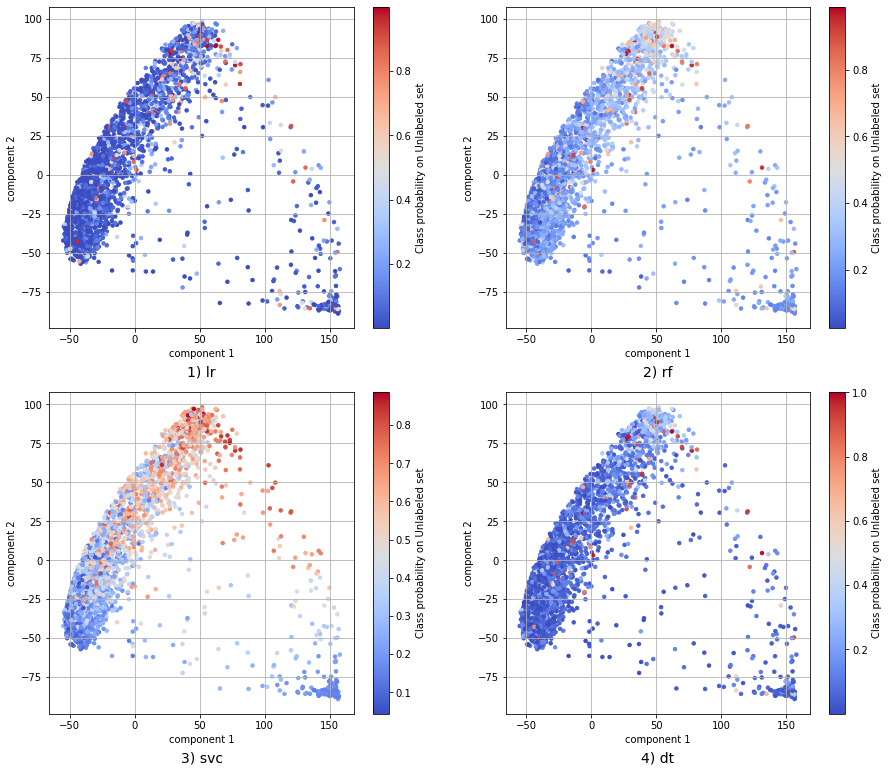

In [111]:
fig = plt.figure(figsize=(15, 13))
models = ['lr', 'rf', 'svc', 'dt']

for i, name in zip(range(5), models):
    ax1 = fig.add_subplot(221 + i)
    sp= ax1.scatter(projected[:,0], projected[:, 1], c=plot_dfs[f'{name}_results']['predicted_y'], 
                linewidth=1, s=12, alpha=1, cmap=plt.cm.get_cmap('coolwarm'), label='unlabeled')
    plt.grid()
    plt.xlabel(f'component {1}')
    plt.ylabel(f'component {2}')
    plt.colorbar(sp, label='Class probability on Unlabeled set')
    ax1.text(0.5,-0.15, f"{i+1}) {name}", size=14, ha="center", 
         transform=ax1.transAxes)
fig.savefig('scz_comparison.pdf')


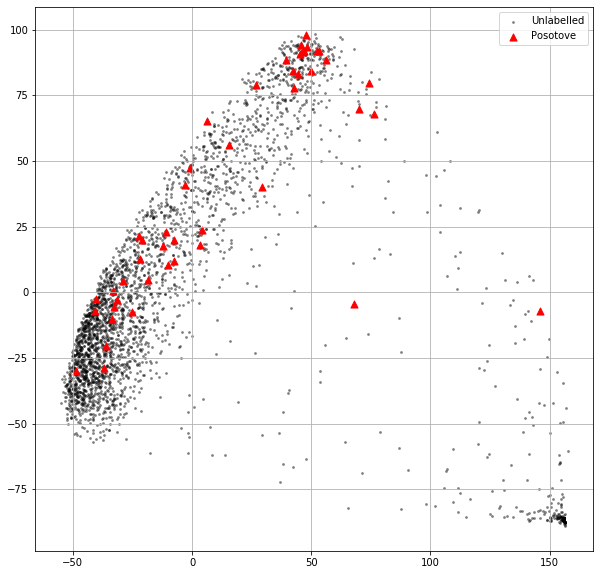

In [112]:
i = 0
j = 1
# data_P = X[y==1]
# data_U = np.concatenate((X[y==1][rp[int(len(rp)*known_labels_ratio):]], X[y==0]), axis=0)
fig = plt.figure(figsize=(10, 10))
plt.scatter(projected[y==0, i], projected[y==0, j], c='k', marker='.', linewidth=0, s=30, alpha=0.5, label='Unlabelled')
plt.scatter(projected[y==1, i], projected[y==1, j], c='r', marker='^', linewidth=1, s=50, alpha=1, label='Posotove')
plt.grid()
plt.legend()
fig.savefig('scz_real_data.pdf')

In [70]:
projected[:,0]

array([ -2.28756788,  61.77236188, -50.53481653, ...,  42.08895047,
       -24.41005435, -30.57492292])

In [161]:
ml_list = [rf, x, y]
new_final = new_final_output(ml_list,X_test, y_test)

[[712  29]
 [  0  15]]
[[710  31]
 [  0  15]]
[[703  38]
 [  0  15]]
[[716  25]
 [  0  15]]
[[702  39]
 [  0  15]]
[[696  45]
 [  0  15]]
[[722  19]
 [  0  15]]
[[721  20]
 [  0  15]]
[[725  16]
 [  0  15]]
[[725  16]
 [  0  15]]
[[722  19]
 [  1  14]]
[[713  28]
 [  0  15]]
[[724  17]
 [  0  15]]
[[716  25]
 [  0  15]]
[[696  45]
 [  0  15]]
[[714  27]
 [  0  15]]
[[717  24]
 [  0  15]]
[[717  24]
 [  0  15]]
[[722  19]
 [  0  15]]
[[709  32]
 [  0  15]]
[[706  35]
 [  0  15]]
[[723  18]
 [  0  15]]
[[722  19]
 [  0  15]]
[[701  40]
 [  0  15]]
[[703  38]
 [  0  15]]
[[723  18]
 [  0  15]]
[[712  29]
 [  0  15]]
[[713  28]
 [  0  15]]
[[719  22]
 [  0  15]]
[[709  32]
 [  0  15]]
[[714  27]
 [  0  15]]
[[714  27]
 [  1  14]]
[[722  19]
 [  0  15]]
[[723  18]
 [  0  15]]
[[726  15]
 [  0  15]]
[[711  30]
 [  1  14]]
[[707  34]
 [  0  15]]
[[720  21]
 [  0  15]]
[[719  22]
 [  0  15]]
[[716  25]
 [  0  15]]
[[725  16]
 [  0  15]]
[[703  38]
 [  2  13]]
[[718  23]
 [  0  15]]
[[719  22]


In [149]:
new_final = new_final.sort_values(by=['Average_prob'], ascending=False).dropna()

In [150]:
new_final

,gene_symbol,Average_prob
1803,RBFOX1,0.992000
1512,CALN1,0.991000
2015,NOL4,0.980808
819,NTRK3,0.976042
1879,TRPM6,0.973196
...,...,...
1871,NOLC1,0.053061
566,TIMELESS,0.052525
547,MBD6,0.042708
755,PAN2,0.042424


In [140]:
new_final.dropna().to_csv('/home/nikita/Desktop/rf.tsv',index=False, sep='\t')

In [103]:
for model in models:
    if model == 'xgb':
        xgb_X_test = np.array(X_test)
        model.fit(new_X_train, new_y_train)
        y_pred = model.predict(X_test)
        print(confusion_matrix(y_test, y_pred))

[[1095    9]
 [  10   13]]
[[1104    0]
 [  23    0]]
[[1090   14]
 [  12   11]]


ValueError: feature_names mismatch: ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50', 'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59', 'f60', 'f61', 'f62', 'f63', 'f64', 'f65', 'f66', 'f67', 'f68', 'f69', 'f70', 'f71', 'f72', 'f73', 'f74', 'f75', 'f76', 'f77', 'f78', 'f79', 'f80', 'f81', 'f82', 'f83', 'f84', 'f85', 'f86', 'f87', 'f88', 'f89', 'f90', 'f91', 'f92', 'f93', 'f94', 'f95', 'f96', 'f97', 'f98', 'f99', 'f100', 'f101', 'f102', 'f103', 'f104', 'f105', 'f106', 'f107', 'f108', 'f109', 'f110', 'f111', 'f112'] ['Adipose - Subcutaneous', 'Adipose - Visceral (Omentum)', 'Adrenal Gland', 'Artery - Aorta', 'Artery - Coronary', 'Artery - Tibial', 'Bladder', 'Brain - Amygdala', 'Brain - Anterior cingulate cortex (BA24)', 'Brain - Caudate (basal ganglia)', 'Brain - Cerebellar Hemisphere', 'Brain - Cerebellum', 'Brain - Cortex', 'Brain - Frontal Cortex (BA9)', 'Brain - Hippocampus', 'Brain - Hypothalamus', 'Brain - Nucleus accumbens (basal ganglia)', 'Brain - Putamen (basal ganglia)', 'Brain - Spinal cord (cervical c-1)', 'Brain - Substantia nigra', 'Breast - Mammary Tissue', 'Cells - EBV-transformed lymphocytes', 'Cells - Transformed fibroblasts', 'Cervix - Ectocervix', 'Cervix - Endocervix', 'Colon - Sigmoid', 'Colon - Transverse', 'DHS', 'Esophagus - Gastroesophageal Junction', 'Esophagus - Mucosa', 'Esophagus - Muscularis', 'Fallopian Tube', 'Fantom5', 'GERP', 'GTEx', 'GTEx_Adipose_Subcutaneous', 'GTEx_Adipose_Visceral_Omentum', 'GTEx_Adrenal_Gland', 'GTEx_Artery_Aorta', 'GTEx_Artery_Coronary', 'GTEx_Artery_Tibial', 'GTEx_Brain_Anterior_cingulate_cortex_BA24', 'GTEx_Brain_Caudate_basal_ganglia', 'GTEx_Brain_Cerebellar_Hemisphere', 'GTEx_Brain_Cerebellum', 'GTEx_Brain_Cortex', 'GTEx_Brain_Frontal_Cortex_BA9', 'GTEx_Brain_Hippocampus', 'GTEx_Brain_Hypothalamus', 'GTEx_Brain_Nucleus_accumbens_basal_ganglia', 'GTEx_Brain_Putamen_basal_ganglia', 'GTEx_Breast_Mammary_Tissue', 'GTEx_Cells_EBV-transformed_lymphocytes', 'GTEx_Cells_Transformed_fibroblasts', 'GTEx_Colon_Sigmoid', 'GTEx_Colon_Transverse', 'GTEx_Esophagus_Gastroesophageal_Junction', 'GTEx_Esophagus_Mucosa', 'GTEx_Esophagus_Muscularis', 'GTEx_Heart_Atrial_Appendage', 'GTEx_Heart_Left_Ventricle', 'GTEx_Liver', 'GTEx_Lung', 'GTEx_Muscle_Skeletal', 'GTEx_Nerve_Tibial', 'GTEx_Ovary', 'GTEx_Pancreas', 'GTEx_Pituitary', 'GTEx_Prostate', 'GTEx_Skin_Not_Sun_Exposed_Suprapubic', 'GTEx_Skin_Sun_Exposed_Lower_leg', 'GTEx_Small_Intestine_Terminal_Ileum', 'GTEx_Spleen', 'GTEx_Stomach', 'GTEx_Testis', 'GTEx_Thyroid', 'GTEx_Uterus', 'GTEx_Vagina', 'GTEx_Whole_Blood', 'Heart - Atrial Appendage', 'Heart - Left Ventricle', 'Kidney - Cortex', 'Liver', 'Lung', 'Minor Salivary Gland', 'Muscle - Skeletal', 'Nearest', 'Nerve - Tibial', 'Ovary', 'PCHiC', 'Pancreas', 'Pituitary', 'Prostate', 'Regulome', 'Skin - Not Sun Exposed (Suprapubic)', 'Skin - Sun Exposed (Lower leg)', 'Small Intestine - Terminal Ileum', 'Spleen', 'Stomach', 'Testis', 'Thyroid', 'Uterus', 'VEP', 'VEP_reg', 'Vagina', 'Whole Blood', 'blastp_similarity', 'gene_interactions', 'gtex_similarity', 'rank', 'score', 'vep_mean', 'vep_sum']
expected f98, f45, f0, f84, f24, f55, f29, f34, f81, f112, f1, f43, f100, f16, f76, f26, f82, f50, f9, f11, f28, f27, f20, f71, f52, f17, f41, f111, f51, f30, f4, f66, f86, f87, f13, f6, f39, f46, f35, f72, f92, f102, f56, f3, f36, f54, f2, f19, f78, f64, f77, f12, f14, f99, f65, f70, f61, f21, f74, f106, f107, f8, f101, f94, f7, f18, f53, f42, f79, f44, f73, f23, f75, f47, f22, f85, f83, f91, f63, f48, f31, f89, f68, f59, f90, f37, f69, f67, f108, f25, f33, f62, f32, f97, f110, f93, f80, f96, f40, f5, f15, f38, f49, f105, f10, f57, f109, f104, f60, f88, f103, f58, f95 in input data
training data did not have the following fields: GTEx_Nerve_Tibial, Adrenal Gland, Stomach, Pituitary, GTEx_Brain_Cerebellum, Brain - Substantia nigra, GTEx_Skin_Sun_Exposed_Lower_leg, GTEx, GTEx_Testis, Colon - Transverse, vep_sum, Regulome, Heart - Atrial Appendage, Thyroid, Colon - Sigmoid, GTEx_Adipose_Visceral_Omentum, rank, PCHiC, Pancreas, GTEx_Esophagus_Mucosa, GTEx_Artery_Coronary, Lung, Uterus, GTEx_Heart_Atrial_Appendage, GTEx_Brain_Hippocampus, GTEx_Pituitary, Artery - Aorta, Prostate, Nerve - Tibial, Adipose - Subcutaneous, GTEx_Liver, Breast - Mammary Tissue, Esophagus - Gastroesophageal Junction, Liver, Brain - Caudate (basal ganglia), Minor Salivary Gland, GTEx_Brain_Frontal_Cortex_BA9, VEP, vep_mean, score, Esophagus - Mucosa, Skin - Sun Exposed (Lower leg), Brain - Cerebellum, Artery - Tibial, Cells - EBV-transformed lymphocytes, GTEx_Prostate, Brain - Frontal Cortex (BA9), Heart - Left Ventricle, GTEx_Brain_Putamen_basal_ganglia, GTEx_Adrenal_Gland, gene_interactions, GTEx_Brain_Cortex, Ovary, GTEx_Spleen, Fantom5, GTEx_Uterus, GTEx_Breast_Mammary_Tissue, GTEx_Skin_Not_Sun_Exposed_Suprapubic, blastp_similarity, GTEx_Heart_Left_Ventricle, Kidney - Cortex, GTEx_Whole_Blood, Esophagus - Muscularis, Whole Blood, GTEx_Esophagus_Gastroesophageal_Junction, Cervix - Ectocervix, Cervix - Endocervix, GTEx_Esophagus_Muscularis, Brain - Spinal cord (cervical c-1), GTEx_Brain_Anterior_cingulate_cortex_BA24, Vagina, GTEx_Stomach, GTEx_Brain_Hypothalamus, Spleen, Small Intestine - Terminal Ileum, Brain - Nucleus accumbens (basal ganglia), GTEx_Brain_Nucleus_accumbens_basal_ganglia, Brain - Hypothalamus, GERP, GTEx_Pancreas, Artery - Coronary, gtex_similarity, Brain - Hippocampus, DHS, Brain - Putamen (basal ganglia), GTEx_Colon_Transverse, GTEx_Ovary, GTEx_Vagina, GTEx_Muscle_Skeletal, Cells - Transformed fibroblasts, GTEx_Artery_Aorta, GTEx_Thyroid, Muscle - Skeletal, GTEx_Lung, GTEx_Adipose_Subcutaneous, GTEx_Cells_Transformed_fibroblasts, Testis, Brain - Cortex, Nearest, Bladder, Skin - Not Sun Exposed (Suprapubic), GTEx_Cells_EBV-transformed_lymphocytes, Fallopian Tube, Brain - Amygdala, Brain - Anterior cingulate cortex (BA24), VEP_reg, GTEx_Colon_Sigmoid, GTEx_Artery_Tibial, GTEx_Small_Intestine_Terminal_Ileum, GTEx_Brain_Caudate_basal_ganglia, GTEx_Brain_Cerebellar_Hemisphere, Brain - Cerebellar Hemisphere, Adipose - Visceral (Omentum)

In [109]:
xgb_X_test =np.array(X_test)
xgb.fit(new_X_train, new_y_train)
y_pred = xgb.predict(xgb_X_test)
print(confusion_matrix(y_test, y_pred))

[[1094   10]
 [  14    9]]


In [93]:
rf.fit(new_X_train, new_y_train)
y_pred = rf.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[1094   10]
 [  10   13]]


# After feature selection

In [32]:
rf.fit(new_X_train, new_y_train)

RandomForestClassifier(bootstrap=True, class_weight={1: 1, 0: 100},
            criterion='entropy', max_depth=10, max_features='log2',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=700, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [71]:
import numpy as np

names_index = list(x)

def variable_importance(fit):
    """
    Purpose
    ----------
    Checks if model is fitted CART model then produces variable importance
    and respective indices in dictionary.

    Parameters
    ----------
    * fit:  Fitted model containing the attribute feature_importances_

    Returns
    ----------
    Dictionary containing arrays with importance score and index of columns
    ordered in descending order of importance.
    """
    try:
        if not hasattr(fit, 'fit'):
            return print("'{0}' is not an instantiated model from scikit-learn".format(fit)) 

        # Captures whether the model has been trained
        if not vars(fit)["estimators_"]:
            return print("Model does not appear to be trained.")
    except KeyError:
        print("Model entered does not contain 'estimators_' attribute.")

    importances = fit.feature_importances_
    indices = np.argsort(importances)[::-1]
    return {'importance': importances,
            'index': indices}

var_imp_rf = variable_importance(rf)

importances_rf = var_imp_rf['importance']

indices_rf = var_imp_rf['index']

def print_var_importance(importance, indices, name_index):
    """
    Purpose
    ----------
    Prints dependent variable names ordered from largest to smallest
    based on information gain for CART model.
    Parameters
    ----------
    * importance: Array returned from feature_importances_ for CART
                models organized by dataframe index
    * indices: Organized index of dataframe from largest to smallest
                based on feature_importances_
    * name_index: Name of columns included in model

    Returns
    ----------
    Prints feature importance in descending order
    """
    print("Feature ranking:")

    for f in range(0, indices.shape[0]):
        i = f
        print("{0}. The feature '{1}' has a Mean Decrease in Impurity of {2:.5f}"
              .format(f + 1,
                      names_index[indices[i]],
                      importance[indices[f]]))

print_var_importance(importances_rf, indices_rf, names_index)

Feature ranking:
1. The feature 'vep_sum' has a Mean Decrease in Impurity of 0.05349
2. The feature 'score' has a Mean Decrease in Impurity of 0.05189
3. The feature 'Nearest' has a Mean Decrease in Impurity of 0.05028
4. The feature 'rank' has a Mean Decrease in Impurity of 0.04774
5. The feature 'VEP' has a Mean Decrease in Impurity of 0.03514
6. The feature 'vep_mean' has a Mean Decrease in Impurity of 0.03301
7. The feature 'gene_interactions' has a Mean Decrease in Impurity of 0.01920
8. The feature 'VEP_reg' has a Mean Decrease in Impurity of 0.01309
9. The feature 'Brain - Putamen (basal ganglia)' has a Mean Decrease in Impurity of 0.01231
10. The feature 'DHS' has a Mean Decrease in Impurity of 0.01210
11. The feature 'gtex_similarity' has a Mean Decrease in Impurity of 0.01190
12. The feature 'Kidney - Cortex' has a Mean Decrease in Impurity of 0.01183
13. The feature 'Brain - Amygdala' has a Mean Decrease in Impurity of 0.01119
14. The feature 'Brain - Cerebellar Hemisphere' 

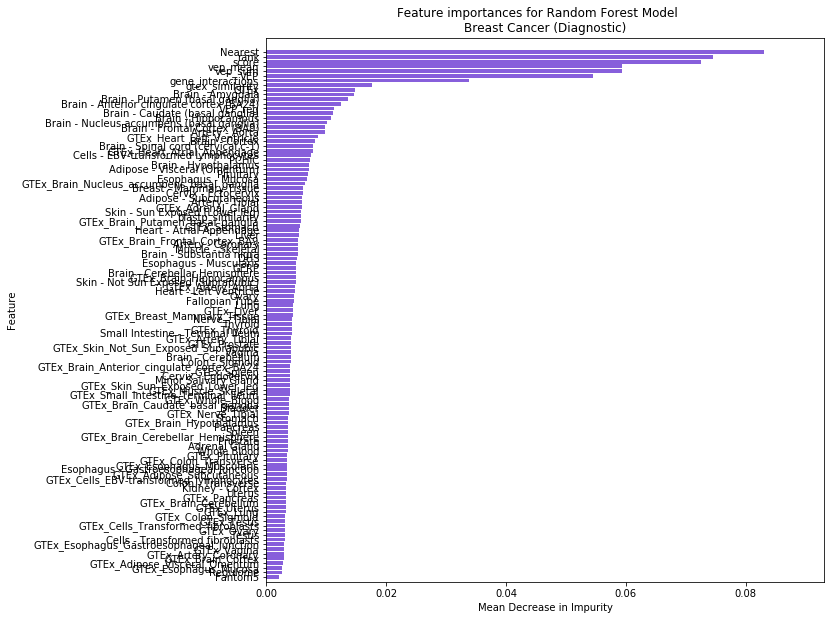

In [34]:
def variable_importance_plot(importance, indices, name_index):
    """
    Purpose
    ----------
    Prints bar chart detailing variable importance for CART model
    NOTE: feature_space list was created because the bar chart
    was transposed and index would be in incorrect order.

    Parameters
    ----------
    * importance: Array returned from feature_importances_ for CART
                models organized by dataframe index
    * indices: Organized index of dataframe from largest to smallest
                based on feature_importances_
    * name_index: Name of columns included in model

    Returns:
    ----------
    Returns variable importance plot in descending order
    """
    index = np.arange(len(names_index))

    importance_desc = sorted(importance)
    feature_space = []
    for i in range(indices.shape[0] - 1, -1, -1):
        feature_space.append(names_index[indices[i]])

    fig, ax = plt.subplots(figsize=(10, 10))

    plt.title('Feature importances for Random Forest Model\
    \nBreast Cancer (Diagnostic)')
    plt.barh(index,
             importance_desc,
             align="center",
             color = '#875FDB')
    plt.yticks(index,
               feature_space)

    plt.ylim(-1, 115)
    plt.xlim(0, max(importance_desc) + 0.01)
    plt.xlabel('Mean Decrease in Impurity')
    plt.ylabel('Feature')

    plt.show()
    plt.close()

variable_importance_plot(importances_rf, indices_rf, names_index)

In [81]:
X_train_reduced = X_train.iloc[:,var_imp_rf['index'][:25]]
X_test_reduced = X_test.iloc[:,var_imp_rf['index'][:25]]

In [82]:
next_X_train, next_y_train = return_SMOTE(X_train_reduced, y_train)

In [83]:
rf = RandomForestClassifier(random_state=42)

In [84]:
new_parameters = best_parameters(rf, next_X_train, next_y_train, PARAM_DIST)

Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 20, 'max_features': 'auto'}


In [40]:
rf.set_params(criterion = new_parameters['criterion'], 
              max_depth = new_parameters['max_depth'], 
              max_features = new_parameters['max_features'],
              n_estimators=750,
              bootstrap=True,
              warm_start=False, 
              oob_score=False,
              min_samples_leaf = 1,
              min_samples_split = 2,
              class_weight = {1:1, 0:100})

RandomForestClassifier(bootstrap=True, class_weight={1: 1, 0: 100},
            criterion='gini', max_depth=20, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=750, n_jobs=None, oob_score=False,
            random_state=42, verbose=0, warm_start=False)

In [85]:
rf.fit(next_X_train, next_y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [86]:
from sklearn.calibration import CalibratedClassifierCV
calib_model = CalibratedClassifierCV(rf, cv='prefit', method='sigmoid')
calib_model.fit(next_X_train, next_y_train)

CalibratedClassifierCV(base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
            cv='prefit', method='sigmoid')

In [87]:
y_pred = calib_model.predict(X_test_reduced)
confusion_matrix(y_test, y_pred)

array([[1094,   10],
       [  16,    7]])

# PU learning

In [73]:
new_x = x #.iloc[:,var_imp_rf['index'][:25]]

In [74]:
n_estimators = 100
model = rf
model.set_params(criterion = new_parameters['criterion'], 
              max_depth = new_parameters['max_depth'], 
              max_features = new_parameters['max_features'],
              n_estimators=750,
              bootstrap=True,
              warm_start=False, 
              oob_score=False,
              min_samples_leaf = 1,
              min_samples_split = 2,
              class_weight = {1:1, 0:100})
estimator = CalibratedClassifierCV(model, cv=5, method='sigmoid')
estimator.fit(new_x, y)

CalibratedClassifierCV(base_estimator=RandomForestClassifier(bootstrap=True, class_weight={1: 1, 0: 100},
            criterion='gini', max_depth=20, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=750, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
            cv=5, method='sigmoid')

In [75]:
ml_list = [estimator, new_x, y]

In [76]:
def final_output(ml_list, n_estimators=100):
    
    estimator = ml_list[0]
    new_x = ml_list[1]
    y = ml_list[2]
    iP = y[y > 0].index
    iU = y[y <= 0].index
    num_oob = pd.DataFrame(np.zeros(shape = y.shape), index = y.index)
    sum_oob = pd.DataFrame(np.zeros(shape = y.shape), index = y.index)
    
    for _ in range(n_estimators):
        # Get a bootstrap sample of unlabeled points for this round
        ib = np.random.choice(iU, replace = True, size = 3 * len(iP))
    
        # Find the OOB data points for this round
        i_oob = list(set(iU) - set(ib))
    
        # Get the training data (ALL positives and the bootstrap
        # sample of unlabeled points) and build the tree
        Xb = new_x[list(y>0)].append(new_x.iloc[ib])
        yb = y[y > 0].append(y.iloc[ib])
        calib_model = estimator
        calib_model.fit(Xb, yb)
        # Record the OOB scores from this round
        sum_oob.loc[i_oob, 0] += calib_model.predict_proba(new_x.iloc[i_oob])[:,1]
        num_oob.loc[i_oob, 0] += 1
    results = pd.DataFrame(new_x.index)
    results['Average_prob'] = sum_oob / num_oob
    return results

In [77]:
results = final_output(ml_list)

In [78]:
results = results.sort_values(by=['Average_prob'], ascending=False)

In [79]:
results

,gene_symbol,Average_prob
174,RBFOX1,0.913146
947,NLGN1,0.907415
1456,CALN1,0.904363
2147,NOL4,0.903255
2834,NTRK3,0.903099
...,...,...
2655,BCL11B,NaN
2761,IGSF9B,NaN
2864,PRKD1,NaN
2943,KCNV1,NaN


In [80]:
results.to_csv('/home/nikita/Desktop/scz.tsv', sep='\t')

In [153]:
# 'gtex_similarity',
#  'blastp_similarity',
#  'gene_interactions',
#  'gene_interactions_within_data'
set(x['gtex_similarity'])

{0, 1, 2, 3, 4, 5, 7}

In [39]:
from sklearn.decomposition import PCA
import itertools

pca = PCA(9)  # project from 64 to 2 dimensions
projected = pca.fit_transform(x)

NameError: name 'results' is not defined

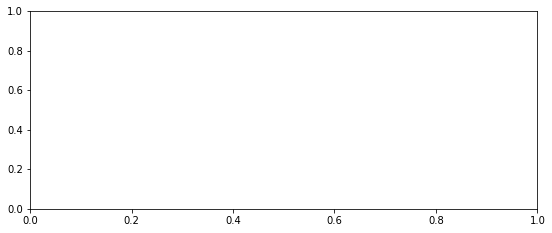

In [83]:


fig = plt.figure(figsize=(20, 8))

for i in range(0,4):
    ax1 = fig.add_subplot(221 + i)
    sp= ax1.scatter(projected[:,i], projected[:, i+1], c=results['Average_prob'], 
                linewidth=3, s=5, alpha=0.7, cmap=plt.cm.get_cmap('coolwarm'), label='unlabeled')
    plt.grid()
    plt.xlabel(f'component {i}')
    plt.ylabel(f'component {i+1}')
    plt.colorbar(sp, label='Class probability on Unlabeled set')

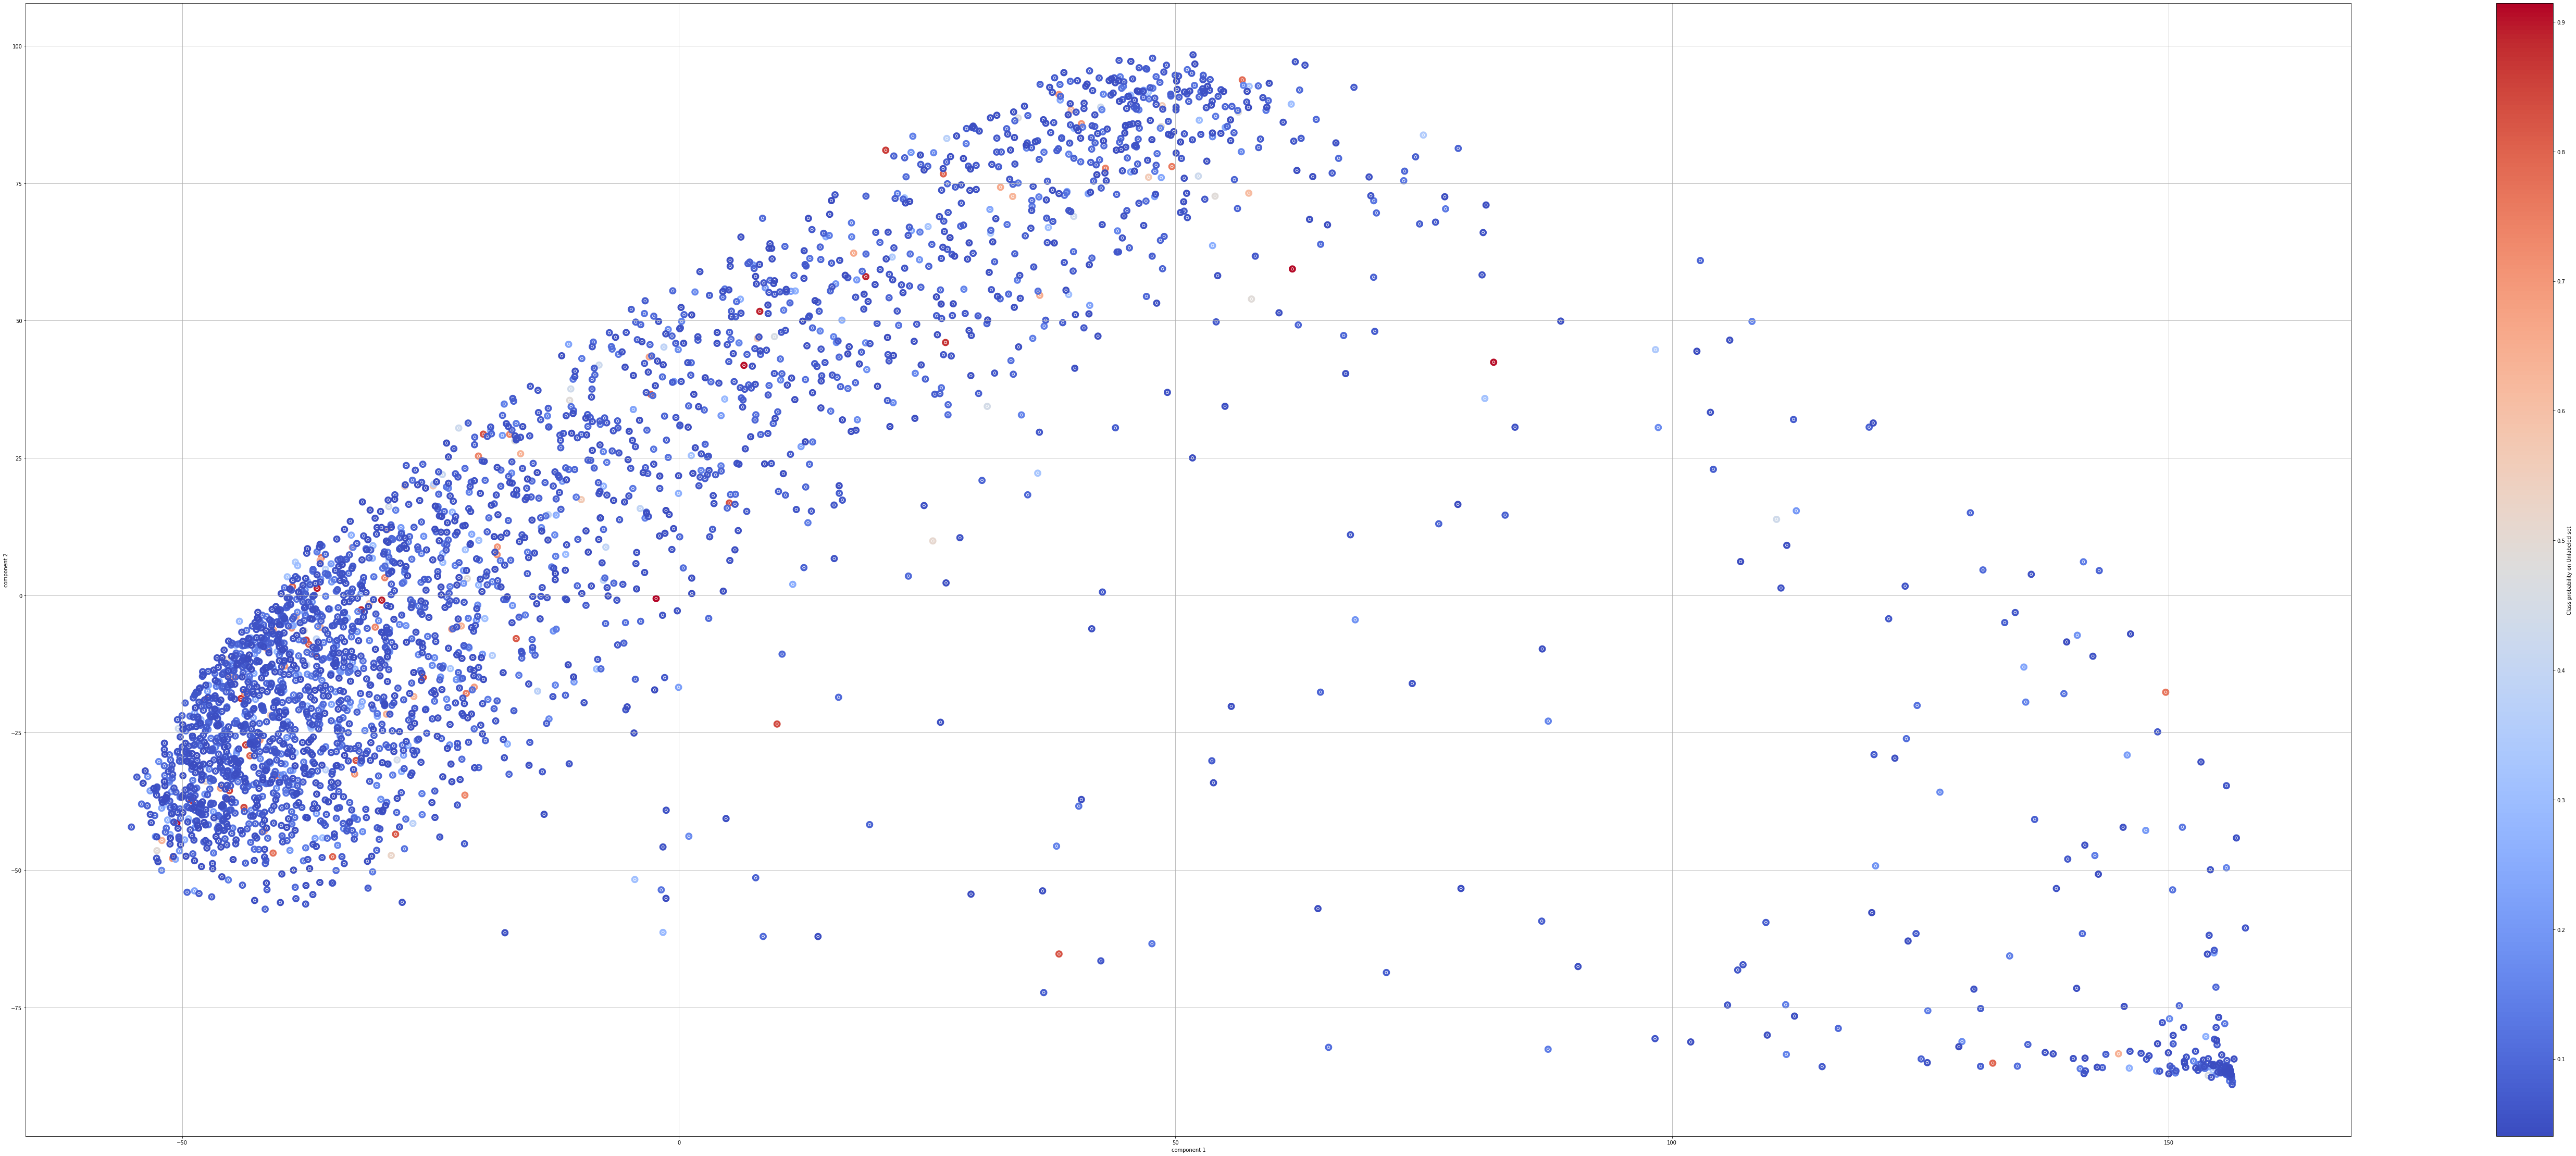

In [55]:
fig = plt.figure(figsize=(100, 40))

ax1 = fig.add_subplot(111)
sp= ax1.scatter(projected[:,0], projected[:, 1], c=results['Average_prob'], 
                linewidth=10, s=15, alpha=1, cmap=plt.cm.get_cmap('coolwarm'), label='unlabeled')
plt.grid()
plt.xlabel(f'component {1}')
plt.ylabel(f'component {2}')
plt.colorbar(sp, label='Class probability on Unlabeled set')

In [206]:
#results['Average_prob'][0:125] = 0.9

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [204]:
results

,gene_symbol,Average_prob
2015,NOL4,0.9
26,KCNB1,0.9
1366,IL1RAPL1,0.9
748,SRPK2,0.9
190,CAAP1,0.9
...,...,...
631,PRKD1,NaN
766,C12orf79,NaN
787,CACNA1C,NaN
969,TCF4,NaN


ValueError: 'c' argument has 2127 elements, which is not acceptable for use with 'x' with size 2160, 'y' with size 2160.

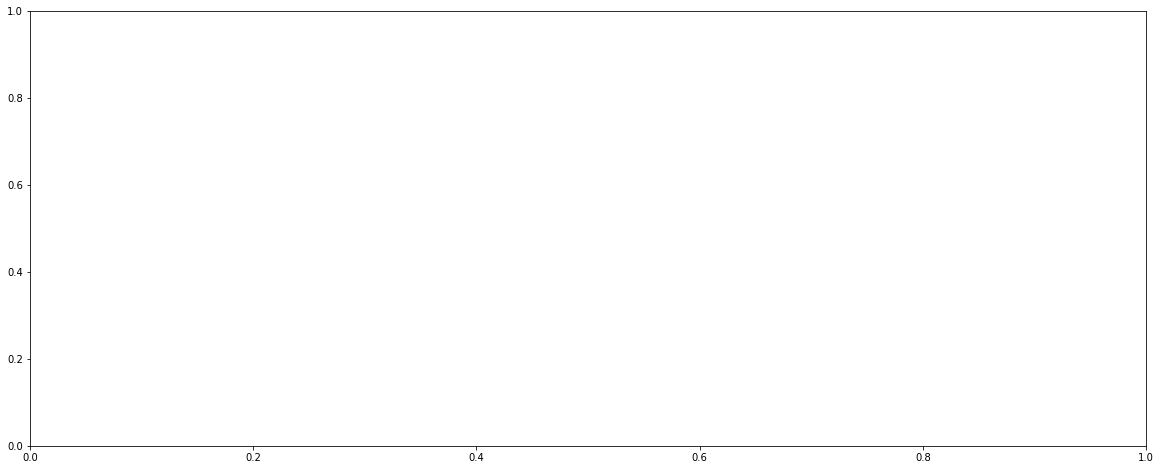

In [303]:
fig = plt.figure(figsize=(20, 8))
ax1 = fig.add_subplot(111)
sp= ax1.scatter(projected[:,0], projected[:, 2], c=results['Average_prob'], 
                linewidth=9, s=5, alpha=0.7, cmap=plt.cm.get_cmap('Blues'), label='unlabeled')
plt.grid()
plt.xlabel(f'component {0}')
plt.ylabel(f'component {1}')
plt.colorbar(sp, label='Class probability on Unlabeled set')

In [64]:
new_x['blastp_similarity']

,blastp_similarity,Nearest,rank,score,gtex_similarity,VEP,vep_mean,vep_sum,Brain - Putamen (basal ganglia),DHS,...,Brain - Frontal Cortex (BA9),Brain - Anterior cingulate cortex (BA24),Brain - Caudate (basal ganglia),Fantom5,Brain - Hypothalamus,Brain - Nucleus accumbens (basal ganglia),Brain - Substantia nigra,Cervix - Ectocervix,Heart - Atrial Appendage,Liver
gene_symbol,,,,,,,,,,,,,,,,,,,,,
KCNB1,2,1.000000,1.087137,1.954306,3,0.012448,0.012448,0.012448,39,0.000000,...,51,46,42,0.0,37,43,31,28,6,20
PTPRZ1,0,0.000000,3.250000,0.993403,1,0.000000,0.000000,0.000000,43,0.000000,...,47,51,49,0.0,45,50,46,26,20,4
KXD1,0,0.000000,39.136594,0.972235,0,0.000000,0.000000,0.000000,1,0.000000,...,15,11,6,0.0,14,10,12,39,5,2
PMM1,0,0.000000,17.174234,0.994665,0,0.000000,0.000000,0.000000,12,0.001928,...,44,23,19,0.0,16,39,10,37,3,15
TGDS,0,0.000000,2.912698,0.973213,0,0.000000,0.000000,0.000000,3,0.000000,...,8,4,11,0.0,13,9,12,37,10,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TMX2,0,0.000000,5.900050,1.172599,0,0.237048,0.237048,3.260037,5,0.000000,...,35,9,10,0.0,15,11,16,43,6,4
ANKRD11,0,0.477064,9.752294,1.911075,0,0.577982,0.577982,6.449541,3,0.000000,...,18,13,5,0.0,10,14,6,40,11,0
DEFB106A,0,0.000000,10.000000,0.276618,0,0.000000,0.000000,0.000000,0,0.276618,...,0,0,0,0.0,0,0,0,0,0,0


In [236]:
results = results.sort_values(by=['Average_prob'], ascending=False).dropna()

In [237]:
results.to_csv('/home/nikita/Desktop/rf_100_just_rf_calib.tsv', sep='\t')

In [65]:
up_list = results[results['Average_prob'] >= 0.03].index

In [66]:
estimator = ml_list[0]
new_x = ml_list[1]
y = ml_list[2]
iP = y[y > 0].index
iU = y[y <= 0].index
num_oob = pd.DataFrame(np.zeros(shape = y.shape), index = y.index)
sum_oob = pd.DataFrame(np.zeros(shape = y.shape), index = y.index)
    
for _ in range(n_estimators):
    # Get a bootstrap sample of unlabeled points for this round
    ib = np.random.choice(iU, replace = True, size = 3 * len(iP))
    
    ib = list(filter(lambda gene: gene not in up_list, ib))
    
    # Find the OOB data points for this round
    i_oob = list(set(iU) - set(ib))
    
    # Get the training data (ALL positives and the bootstrap
    # sample of unlabeled points) and build the tree
    Xb = new_x[list(y>0)].append(new_x.iloc[ib])
    yb = y[y > 0].append(y.iloc[ib])
    estimator.fit(Xb, yb)
    
        # Record the OOB scores from this round
    sum_oob.loc[i_oob, 0] += estimator.predict_proba(new_x.iloc[i_oob])[:,1]
    num_oob.loc[i_oob, 0] += 1
    
results = pd.DataFrame(new_x.index)
results['Average_prob'] = sum_oob / num_oob

In [67]:
results

,gene_symbol,Average_prob
0,KCNB1,0.753997
1,PTPRZ1,0.100385
2,KXD1,0.025165
3,PMM1,0.025233
4,TGDS,0.025190
...,...,...
2155,TMX2,0.027307
2156,ANKRD11,0.036138
2157,DEFB106A,0.025728
2158,INSM1,0.025447


In [301]:
results = results.sort_values(by=['Average_prob'], ascending=False).dropna()

In [302]:
results.to_csv('/home/nikita/Desktop/xb_100_with_pu_and_new_f.tsv', sep='\t')

In [91]:
len(x.index)

2160

#  xgboost

In [285]:
def xgb_model(train_data, train_label, test_data, test_label):
    clf = xgb.XGBClassifier(max_depth=10,
                           min_child_weight=1,
                           learning_rate=0.1,
                           n_estimators=800,
                           silent=True,
                           objective='binary:logistic',
                           gamma=0,
                           max_delta_step=0,
                           subsample=1,
                           colsample_bytree=1,
                           colsample_bylevel=1,
                           reg_alpha=0,
                           reg_lambda=0,
                           scale_pos_weight=1,
                           seed=1,
                           missing=None,
                           class_weight = {1:.9, 0:.1})
    clf.fit(train_data, train_label, eval_metric='auc', verbose=True,
            eval_set=[(test_data, test_label)], early_stopping_rounds=100)
    y_pre = clf.predict(test_data)
    y_pro = clf.predict_proba(test_data)[:, 1]
    #print "AUC Score : %f" % metrics.roc_auc_score(test_label, y_pro)
    #print"Accuracy : %.4g" % metrics.accuracy_score(test_label, y_pre)
    return clf

In [286]:
next_X_train = pd.DataFrame(next_X_train, columns=list(X_train_reduced))
X_test_reduced = pd.DataFrame(X_test_reduced, columns=list(X_train_reduced))

In [287]:
xgb_model = xgb_model(next_X_train, next_y_train, X_test_reduced, y_test)

[0]	validation_0-auc:0.965857
Will train until validation_0-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:0.965812
[2]	validation_0-auc:0.998875
[3]	validation_0-auc:0.998516
[4]	validation_0-auc:0.99856
[5]	validation_0-auc:0.999055
[6]	validation_0-auc:0.998965
[7]	validation_0-auc:0.933468
[8]	validation_0-auc:0.933468
[9]	validation_0-auc:0.933468
[10]	validation_0-auc:0.99928
[11]	validation_0-auc:0.99928
[12]	validation_0-auc:0.99928
[13]	validation_0-auc:0.99919
[14]	validation_0-auc:0.99919
[15]	validation_0-auc:0.99937
[16]	validation_0-auc:0.99928
[17]	validation_0-auc:0.99928
[18]	validation_0-auc:0.99919
[19]	validation_0-auc:0.99928
[20]	validation_0-auc:0.99928
[21]	validation_0-auc:0.99937
[22]	validation_0-auc:0.99937
[23]	validation_0-auc:0.99937
[24]	validation_0-auc:0.99937
[25]	validation_0-auc:0.99937
[26]	validation_0-auc:0.99937
[27]	validation_0-auc:0.99937
[28]	validation_0-auc:0.99937
[29]	validation_0-auc:0.99937
[30]	validation_0-auc:0.99937
[31]	v

In [288]:
y_pred = xgb_model.predict(X_test_reduced)
confusion_matrix(y_test, y_pred)

array([[741,   0],
       [  1,  14]])

In [206]:
calib_model = CalibratedClassifierCV(xgb_model, cv='prefit', method='sigmoid')

In [ ]:
# References:

#1) https://www.inertia7.com/projects/95
#1*) https://www.datascience.com/resources/notebooks/random-forest-intro

In [1]:
from var import *

In [2]:
def add_gene_similarity_feature(df, db, causal_genes):
    """
    For each gene in df counts how many similar genes are in true_genes.
    Use in order to add two new features: gtex_similarity, blastp_similarity.
    """
    feature = list()
    for gene in df['gene_symbol']:
        if gene in db.index:
            gene_list = db.loc[gene, 'similar_genes']
            if type(gene_list) != float:
                gene_list = gene_list.split(",")
                print(gene_list)
                s = sum(
                    list(map(lambda x: x in causal_genes['gene_symbol'].values, gene_list)))
                feature.append(s)
            else:
                feature.append(0)
        else:
            feature.append(0)
    print('One of the UCSC gene similarity feature is added')
    return feature

In [45]:
causal_genes = pd.read_csv('true_genes.tsv', sep='\t')

In [79]:
blastp_db = pd.read_csv('blastp_db.tsv', sep='\t', index_col=0)

In [80]:
sum(add_gene_similarity_feature(gtex_frames, blastp_db, causal_genes))

['CACNB1', 'CACNB4', 'CACNB3']
['MMP24', 'MMP14', 'MMP15', 'MMP25', 'MMP17', 'MMP8', 'MMP13', 'MMP12', 'MMP3', 'MMP1', 'MMP11', 'MMP10', 'MMP20', 'MMP27', 'MMP19', 'MMP28', 'MMP2', 'MMP7', 'MMP26', 'MMP21', 'MMP9', 'MMP23B', 'VTN', 'HPX', 'PRG4']
['GRIN2B', 'GRIN2C', 'GRIN2D', 'GRIN3A', 'GRIN1', 'GRIN3B', 'GRIK2', 'GRIK1', 'GRIK3', 'GRIK5', 'GRIA1', 'GRIA3', 'GRIK4', 'GRID2', 'GRIA4', 'GRIA2', 'GRID1']
['IGSF9', 'HMCN1', 'CNTN6', 'ROBO2', 'DKFZp434P0216', 'PRTG', 'NEO1', 'CNTN3', 'CNTN4', 'NRCAM', 'PXDN', 'ROBO1', 'DCC', 'PXDNL', 'CNTN5', 'L1CAM', 'TTN', 'NFASC', 'ROBO3', 'DSCAM', 'HSPG2', 'SDK1', 'CNTN2', 'IGDCC3', 'SDK2', 'IGSF10', 'CNTN1', 'MXRA5', 'DSCAML1', 'IGDCC4', 'OPCML', 'NPHS1', 'CHL1', 'NCAM2', 'PTK7', 'NTM', 'MYLK', 'PTPRD', 'NCAM1', 'LSAMP', 'LRIG2', 'MDGA1', 'MUSK', 'SPEG', 'PTPRS', 'LRIG1', 'BOC', 'PTPRF', 'OBSL1', 'PAPLN', 'TYRO3', 'LRIG3', 'MYBPC2', 'CDON', 'OBSCN', 'IGSF22', 'ICAM5', 'CADM2', 'CEACAM5', 'IGLON5', 'KIRREL', 'MDGA2', 'KIRREL2', 'ADAMTSL1', 'FLT1', 'CD2

['TPD52L1', 'TPD52', 'TPD52L3']
['GLYATL1', 'GLYAT', 'GLYATL3']
['CXADR', 'CXADRP2', 'GPA33', 'VSIG8', 'IGSF11', 'VSIG1', 'VSIG2', 'ESAM', 'LSAMP', 'PXDN', 'TTN', 'JAM3', 'F11R', 'NTM', 'OPCML', 'DKFZp434P0216', 'CD22', 'HMCN1', 'JAM2', 'PXDNL', 'SDK2', 'DSCAM', 'BTNL2', 'BTNL2', 'BTNL2', 'BTNL2', 'BTNL2', 'BTNL2', 'BTNL2', 'BTNL2', 'HSPG2', 'VSIG4', 'IGSF10', 'CNTN4', 'NCAM2', 'FCRL2', 'ROBO2', 'OBSCN', 'BTN3A3', 'CD2', 'FGFR4', 'SDK1', 'ROBO3', 'ROBO1', 'BTN1A1', 'BTN3A2', 'CNTN5', 'MYPN', 'NEGR1', 'MXRA5', 'FCRL5', 'FCRL3', 'CNTN2', 'BTN2A2', 'PALLD', 'CNTN6', 'MAG', 'MYOT', 'BTN3A1', 'MUSK', 'IGSF9B', 'NEO1', 'CD276', 'BTNL9', 'MPZL3', 'MDGA2', 'LRIG1', 'BTN2A1', 'ADAMTSL1', 'LRIG3', 'PTPRF', 'NPHS1', 'CD80', 'MYLK', 'CNTN3', 'NRCAM', 'FGFRL1', 'CNTN1', 'ADAMTSL3', 'HEPACAM2', 'PTK7', 'MPZL2', 'MERTK', 'FGFR2', 'NFASC']
['CHRNA6', 'CHRNA2', 'CHRNA4', 'CHRNB4', 'CHRNB2', 'CHRNA1', 'CHRNB3', 'CHRNA5', 'CHRNA7', 'CHRNB1', 'CHRND', 'CHRNA9', 'CHRNA10', 'CHRNE', 'CHRNG', 'CHRFAM7A', 'HT

['PDCD2']
['ZBED6', 'ZBED1', 'ZBED1', 'ZNF618', 'ZBED2']
['SH3GL1', 'SH3GL2', 'SH3GL1P1', 'SH3GLB1', 'SH3RF1', 'SH3GLB2', 'SH3RF3', 'SH3RF2', 'ARHGAP44', 'SORBS2', 'GRB2', 'SH3D19', 'SORBS1', 'SH3KBP1', 'NCF4', 'ARHGAP17', 'OSTF1', 'SORBS3', 'ABI2', 'ITSN1', 'ITSN2', 'HCLS1', 'SH3YL1', 'CD2AP', 'STAM', 'ARHGEF7', 'SGSM3', 'MYO1F', 'GRAP2', 'STAM2', 'SNX18', 'ABI1', 'STAC', 'VAV1', 'LASP1', 'MYO1E', 'DNMBP', 'SH3D21', 'DBNL', 'MAP3K11', 'GRAP', 'STAC2', 'NOSTRIN', 'PACSIN1', 'ARHGEF6', 'GRAPL', 'NEBL', 'ABI3', 'PACSIN2', 'NEB', 'ASAP1', 'SPTAN1', 'NCF2', 'CASS4', 'NEDD9', 'SNX9', 'VAV2', 'ASAP2', 'RIMBP2', 'GAS7', 'ARHGEF4', 'LCK', 'SNX33', 'CRK', 'FCHSD2', 'TP53BP2', 'KIAA1804', 'ARHGEF5', 'SRC', 'FYN', 'PACSIN3', 'AHI1', 'SPATA13', 'VAV3', 'PSTPIP1', 'YES1', 'STAC3', 'CRKL', 'BCAR1', 'FNBP1L']
['DKK2', 'DKK4', 'DKK3']
['ZNF135', 'ZNF678', 'ZNF709', 'ZNF45', 'ZNF16', 'ZFP2', 'ZNF14', 'ZNF726', 'ZNF791', 'ZNF93', 'ZNF782', 'ZNF84', 'ZNF84', 'ZNF568', 'ZNF569', 'ZNF429', 'ZNF235', 'ZSCAN

['ALDH3A2', 'ALDH3B1', 'ALDH3B2', 'ALDH9A1', 'ALDH1A3', 'ALDH1A1', 'ALDH1L2', 'ALDH8A1', 'ALDH1B1', 'ALDH1A2', 'ALDH2', 'ALDH5A1', 'ALDH1L1', 'ALDH6A1', 'ALDH7A1', 'ALDH4A1', 'ALDH16A1']
['NKAIN2', 'NKAIN3', 'NKAIN1']
['CALHM3', 'CALHM2', 'FAM26F', 'FAM26D']
['SEC22B', 'VAMP4']
['UNC45B', 'FKBPL', 'FKBPL', 'FKBPL', 'FKBPL', 'TTC1', 'TOMM34', 'RPAP3', 'SPAG1', 'ZC3H7B', 'STUB1', 'PPP5C', 'SGTB', 'LONRF3', 'TOMM70A', 'DYX1C1', 'ZC3H7A', 'STIP1', 'DNAJC7', 'FKBP4', 'PPID', 'TTC28', 'TANC1', 'TTC12', 'TTC9C', 'FKBP8', 'FKBP5', 'AIPL1', 'TTC25', 'SMYD4', 'TANC2', 'TTC4', 'TTC31', 'AIP', 'LONRF2']
['GLS', 'ANKRD7', 'ANKRD16', 'ANKRD1', 'ANKS1A', 'ANK3', 'ASPG', 'EHMT1', 'BCOR', 'ESPNP', 'ANKRD11', 'TNKS', 'ESPN', 'TONSL', 'PPP1R12B', 'PSMD10', 'USH1G', 'RIPK4', 'KIDINS220', 'TNKS2', 'ANKRD20A3', 'ANKRD20A3', 'ANKRD20A3', 'ANKRD2', 'ANKRD29', 'CDKN2C', 'GABPB2', 'TP53BP2', 'RAI14', 'ANKRD42', 'BARD1', 'ANK2', 'ANK1', 'ANKRD20A4', 'FEM1B', 'DAPK1', 'ANKK1', 'ANKRD12', 'ANKRD20A5P', 'MIB2', 'CA

112

In [69]:
new = GTEX_SIMILARITY_DB['similar_genes'].map(lambda x: x.replace("'", '').replace("]", '').replace("[", '').replace(" ", '') if type(x) != float else None)

In [70]:
new.map(lambda x: type(x))

A1BG        <class 'NoneType'>
A1BG-AS1         <class 'str'>
A1CF             <class 'str'>
A2M         <class 'NoneType'>
A2M-AS1          <class 'str'>
                   ...        
ZYG11A           <class 'str'>
ZYG11B      <class 'NoneType'>
ZYX         <class 'NoneType'>
ZZEF1            <class 'str'>
ZZZ3             <class 'str'>
Name: similar_genes, Length: 28252, dtype: object

In [71]:
new.to_csv('gtex_db.tsv', sep='\t')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


## UKBB

In [87]:
ukbb_1 = pd.read_csv('/home/nikita/Downloads/1001.assoc.tsv', sep='\t')

In [82]:
ukbb_1.head()

,variant,rsid,nCompleteSamples,AC,ytx,beta,se,tstat,pval
0,5:43888254:C:T,rs13184706,34342,1247.770,4709.35,0.001507,0.034122,0.044164,0.964774
1,5:43888493:C:T,rs58824264,34342,269.278,1002.72,-0.043666,0.072722,-0.600456,0.548206
2,5:43888556:T:C,rs72762387,34342,1663.980,6287.12,0.010876,0.029734,0.365764,0.714543
3,5:43888648:C:T,rs115032754,34342,1411.950,5253.19,-0.050457,0.032417,-1.556510,0.119596
4,5:43888690:C:G,rs147555725,34342,112.996,415.78,-0.093960,0.114559,-0.820186,0.412116


In [83]:
len(ukbb_1)

10894596

In [89]:
ukbb_1 = ukbb_1.query('pval <= 10**-6')

In [90]:
ukbb_1

,variant,rsid,nCompleteSamples,AC,ytx,beta,se,tstat,pval
141088,10:96525779:C:T,rs572110881,34342,238.784,989.588,0.393107,0.078779,4.99003,6.066430e-07
141272,10:96560284:C:T,rs191705666,34342,233.769,969.325,0.399404,0.080078,4.98767,6.140920e-07
164644,7:52903807:A:C,rs11238232,34342,7592.620,28120.400,-0.071991,0.014356,-5.01485,5.333860e-07
164651,7:52904446:C:G,rs62444552,34342,7537.090,27918.700,-0.071153,0.014404,-4.93996,7.850750e-07
164861,7:52931493:G:A,rs725867,34342,7473.950,27681.800,-0.071180,0.014427,-4.93387,8.099470e-07
164865,7:52932283:G:A,rs6974952,34342,7474.060,27682.300,-0.071164,0.014427,-4.93274,8.146280e-07
266572,6:5043326:G:A,rs12200195,34342,6275.740,23199.200,-0.078193,0.015650,-4.99624,5.874490e-07
266573,6:5043336:A:G,rs12194104,34342,6276.640,23202.100,-0.078289,0.015649,-5.00271,5.680750e-07
266577,6:5043828:A:T,rs57919800,34342,6284.400,23226.100,-0.079148,0.015652,-5.05688,4.283700e-07
1046401,10:95988132:G:A,rs181317052,34342,212.020,883.702,0.415534,0.083540,4.97409,6.587020e-07


## Interactions and gene types

In [4]:
import pandas as pd

In [15]:
event = pd.read_csv('databases/ggLink.txt', sep='\t', header=None)
event.head(20)

,0,1,2,3,4,5,6,7,8,9
0,2,C2,ppi,0,0,0,ophid|hprd,3,NaN,NaN
1,2,C3,ppi,0,0,0,hprd,8,NaN,NaN
2,2,C4B,ppi,0,0,0,hprd,8,NaN,NaN
3,2,C4BPA,ppi,0,0,0,ophid|hprd,2,NaN,NaN
4,2,C5,ppi,0,0,0,hprd,8,NaN,NaN
5,2,CD46,ppi,0,0,0,ophid|hprd,3,NaN,NaN
6,2,CFB,ppi,0,0,0,ophid|hprd,3,NaN,NaN
7,2,CR1,ppi,0,0,0,ophid|hprd,3,NaN,NaN
8,2,EEF1A1,ppi,0,0,0,ophid|hprd,2,NaN,NaN
9,2,MASP1,ppi,0,0,0,hprd,5,NaN,NaN


In [16]:
event.columns = [f'column_{i}' for i in range(1,11)]

In [34]:
our_db = pd.DataFrame(columns=['gene_symbol', 'gene_interactions'], index = event.column_1.unique())
our_db

,gene_symbol,gene_interactions
2,NaN,NaN
25653,NaN,NaN
A1BG,NaN,NaN
A1CF,NaN,NaN
A2M,NaN,NaN
...,...,...
ZWILCH,NaN,NaN
ZWINT,NaN,NaN
ZXDA,NaN,NaN
ZXDC,NaN,NaN


In [37]:
for gene in list(event.column_1.unique()):
    interactions = set(event.query('column_1 == @gene').column_2)
    interactions = str(interactions).replace(' ', '').replace('}','').replace('{','').replace("'",'')
    our_db.loc[gene, 'gene_interactions'] = interactions

In [40]:
our_db = our_db.drop('gene_symbol', axis=1)

In [44]:
our_db.to_csv('databases/UCSC_gene_interactions.tsv', sep='\t')

In [35]:
our_db = pd.read_csv('databases/UCSC_gene_interactions.tsv', sep='\t', index_col=0)

In [36]:
causal_genes = pd.read_csv('true_genes.tsv', sep='\t')

In [37]:
def add_gene_similarity_feature(df, db, causal_genes):
    """
    For each gene in df counts how many similar genes are in true_genes.
    Use in order to add two new features: gtex_similarity, blastp_similarity.
    """
    feature = list()
    for gene in df['gene_symbol']:
        if gene in db.index:
            gene_list = db.loc[gene, 'associated_genes']
            if type(gene_list) != float:
                gene_list = gene_list.split(",")
                s = sum(
                    list(map(lambda x: x in causal_genes['gene_symbol'].values, gene_list)))
                feature.append(s)
            else:
                feature.append(0)
        else:
            feature.append(0)
    print('One of the UCSC gene similarity feature is added')
    return feature

In [38]:
new_feature = add_gene_similarity_feature(gtex_frames, our_db, causal_genes)

One of the UCSC gene similarity feature is added


In [40]:
sum(new_feature)

489

In [41]:
gtex_frames['gene_interactions'] = new_feature

In [57]:
gtex_frames.to_csv('/home/nikita/Desktop/gtex_frames_200819_with_new_f.tsv', sep='\t', index=False)

In [55]:
gtex_frames.drop('gene_id', axis=1, inplace=True)

In [56]:
gtex_frames

,gene_symbol,DHS,Fantom5,GERP,GTEx,GTEx_Adipose_Subcutaneous,GTEx_Adipose_Visceral_Omentum,GTEx_Adrenal_Gland,GTEx_Artery_Aorta,GTEx_Artery_Coronary,...,Spleen,Stomach,Testis,Thyroid,Uterus,Vagina,Whole Blood,gtex_similarity,blastp_similarity,gene_interactions
0,CACNB2,0.000000,0.000000,-0.706761,0.855810,0.180683,0.327568,0.779113,0.697787,0.599498,...,2,7,6,12,41,20,0,0,0,1
1,MMP16,0.000000,0.000000,-0.736858,0.938163,0.927943,0.923963,0.847161,0.846519,0.692182,...,11,7,21,18,32,25,0,0,0,1
2,GRIN2A,0.000000,0.002357,-1.016601,0.928528,0.617306,0.802713,0.000000,0.601764,0.538720,...,1,26,43,30,35,33,0,3,0,1
3,IGSF9B,0.056191,0.000000,-1.603815,0.993207,0.232759,0.424462,0.510506,0.939385,0.744309,...,12,11,37,40,49,35,2,0,1,0
4,BCL11B,0.022457,0.036019,-1.691475,0.862090,0.747527,0.323241,0.551260,0.233302,0.307911,...,46,25,32,35,15,45,39,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2155,TMX2,0.000000,0.000000,-0.228954,0.930905,0.710122,0.391528,0.289484,0.140248,0.278750,...,25,20,18,50,44,34,0,0,0,0
2156,ANKRD11,0.000000,0.000000,-0.599760,0.856029,0.332294,0.657469,0.645999,0.676155,0.684710,...,35,15,38,39,50,33,9,0,0,0
2157,DEFB106A,0.276618,0.000000,-0.026300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
2158,INSM1,0.000000,0.000000,-1.089286,0.961335,0.350231,0.000000,0.169637,0.000000,0.000000,...,15,22,23,11,0,0,0,0,0,0


In [2]:
import pandas as pd
import glob
import os

from InputProcessingClasses import *
from InputProcessingFunctions import *
from MLAutomationFunctions import *

In [3]:
path = r'/home/nikita/Documents/work/git_projects/GPrior/scz/' # use your path
all_files = glob.glob(os.path.join(path, "*.tsv"))

li = []

for filename in all_files:
    df = pd.read_csv(filename, sep='\t')
    li.append(df)
    print(filename)

#frame = pd.concat(li, axis=0, ignore_index=True)

/home/nikita/Documents/work/git_projects/GPrior/scz/5_scz_output.tsv
/home/nikita/Documents/work/git_projects/GPrior/scz/3_scz_output.tsv
/home/nikita/Documents/work/git_projects/GPrior/scz/2_scz_output.tsv
/home/nikita/Documents/work/git_projects/GPrior/scz/1_scz_output.tsv
/home/nikita/Documents/work/git_projects/GPrior/scz/6_scz_output.tsv
/home/nikita/Documents/work/git_projects/GPrior/scz/4_scz_output.tsv
/home/nikita/Documents/work/git_projects/GPrior/scz/7_scz_output.tsv
/home/nikita/Documents/work/git_projects/GPrior/scz/8_scz_output.tsv


In [4]:
frame = pd.concat(li, axis=0, ignore_index=True)

In [6]:
new_frame = combine_duplicates(frame)

In [7]:
new_frame

,gene_symbol,Adipose - Subcutaneous,Adipose - Visceral (Omentum),Adrenal Gland,Artery - Aorta,Artery - Coronary,Artery - Tibial,Bladder,Brain - Amygdala,Brain - Anterior cingulate cortex (BA24),...,VEP_reg,Vagina,Whole Blood,blastp_similarity,gene_interactions,gtex_similarity,rank,score,vep_mean,vep_sum
0,HIST1H4H,9.0,25.0,22.0,37.0,42.0,46.0,33.0,15.0,16.0,...,0.287548,32.0,49.0,0.0,0.0,0.0,31.231260,0.416400,0.000013,0.000025
1,PCDHA11,10.0,23.0,18.0,0.0,12.0,0.0,13.0,29.0,40.0,...,0.191630,4.0,0.0,0.0,0.0,0.0,17.121145,1.000353,0.000000,0.000000
2,PTPN1,31.0,25.0,24.0,49.0,43.0,48.0,37.0,0.0,3.0,...,0.133333,38.0,35.0,0.0,1.0,0.0,4.800000,0.993352,0.000000,0.000000
3,SYCE3,14.0,17.0,28.0,0.0,0.0,0.0,0.0,36.0,33.0,...,0.298754,11.0,13.0,0.0,0.0,0.0,18.069648,0.989382,0.000000,0.000000
4,C1orf100,6.0,10.0,13.0,12.0,28.0,8.0,42.0,18.0,25.0,...,0.471616,14.0,11.0,0.0,0.0,0.0,12.772926,0.008753,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3214,CPPED1,39.0,23.0,33.0,49.0,43.0,36.0,37.0,6.0,7.0,...,0.008867,35.0,52.0,0.0,0.0,0.0,3.727094,0.984177,0.000000,0.000000
3215,FAM103A1,22.0,16.0,24.0,32.0,28.0,37.0,39.0,4.0,14.0,...,0.102472,46.0,8.0,0.0,0.0,0.0,4.905589,0.940294,0.000000,0.000000
3216,DOC2A,8.0,27.0,32.0,13.0,15.0,3.0,14.0,45.0,47.0,...,0.274070,25.0,1.0,1.0,0.0,2.0,7.912187,1.297149,0.200944,3.023430
3217,HRH1,45.0,40.0,9.0,52.0,47.0,49.0,38.0,25.0,35.0,...,0.500000,44.0,1.0,1.0,0.0,0.0,17.125000,0.970432,0.000000,0.000000


In [8]:
new_frame.to_csv('combined_scz.tsv', sep='\t', index=False)